In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

Add data from OzON script, final data

In [3]:
df1 = pd.read_excel('plot_data/max/Oz2_OzON_RT2_500_LIVER_12dec23.xlsx')
df2 = pd.read_excel('plot_data/max/Oz2_OzON_RT2_500_brain5xFAD_12dec23.xlsx')
df3 = pd.read_excel('plot_data/max/Oz2_OzON_RT2_500_brainWT_12dec23.xlsx')

df = pd.concat([df1, df2, df3], axis=0) 
#drop Cluster_Label and Group columns
df = df.drop(['Cluster_Label', 'Group', 'LipidParent_Ion', 'Transition'], axis=1)
#drop unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,Lipid,Sample_ID,db_pos,Product_Ion,Retention_Time,OzESI_Intensity,Parent_Ion
0,[TG(50:3)]_FA18:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-7,547.5,13.89,1214,764.7
1,[TG(50:3)]_FA18:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-9,547.5,13.94,13197,736.7
2,[TG(50:3)]_FA18:1,12012023_FAD131_M1_5xFAD_liver_O3on_01,n-7,547.5,13.93,2417,764.7
3,[TG(50:3)]_FA18:1,12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,547.5,13.98,32075,736.7
4,[TG(50:3)]_FA18:1,12012023_FAD131_M2_5xFAD_liver_O3on_01,n-7,547.5,13.93,4463,764.7
...,...,...,...,...,...,...,...
169,"[TG(57:9),TG(56:2)]_FA18:1",11282023_FAD184_F3_WT_cortex_O3on_01,n-9,633.6,17.91,511,822.8
170,"[TG(57:9),TG(56:2)]_FA18:1",11282023_FAD184_F3_WT_hippo_O3on_01,n-9,633.6,17.91,620,822.8
171,"[TG(57:9),TG(56:2)]_FA18:1",11282023_FAD184_F4_WT_cereb_O3on_01,n-9,633.6,17.91,549,822.8
172,"[TG(57:9),TG(56:2)]_FA18:1",11282023_FAD185_M4_WT_cereb_O3on_01,n-9,633.6,17.91,2292,822.8


Add Liver Brain label

In [4]:

# Define function to extract biology term
def extract_biology(sample_id):
    for term in ["liver", "cortex", "cereb", "hippo", "dienc"]:
        if term in sample_id.lower():
            return term
    return None

# Apply function to create new column
df['Biology'] = df['Sample_ID'].apply(extract_biology)
df['Genotype'] = df['Sample_ID'].apply(lambda x: '5xFAD' if 'WT' not in x else 'WT')

# df.to_csv('df_for_gpt.csv')

# Extracting the mouse name from the 'Sample_ID' column
df['Mouse'] = df['Sample_ID'].apply(lambda x: '_'.join(x.split('_')[1:3]))
df

,Lipid,Sample_ID,db_pos,Product_Ion,Retention_Time,OzESI_Intensity,Parent_Ion,Biology,Genotype,Mouse
0,[TG(50:3)]_FA18:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-7,547.5,13.89,1214,764.7,liver,5xFAD,DOD73_M2
1,[TG(50:3)]_FA18:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-9,547.5,13.94,13197,736.7,liver,5xFAD,DOD73_M2
2,[TG(50:3)]_FA18:1,12012023_FAD131_M1_5xFAD_liver_O3on_01,n-7,547.5,13.93,2417,764.7,liver,5xFAD,FAD131_M1
3,[TG(50:3)]_FA18:1,12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,547.5,13.98,32075,736.7,liver,5xFAD,FAD131_M1
4,[TG(50:3)]_FA18:1,12012023_FAD131_M2_5xFAD_liver_O3on_01,n-7,547.5,13.93,4463,764.7,liver,5xFAD,FAD131_M2
...,...,...,...,...,...,...,...,...,...,...
169,"[TG(57:9),TG(56:2)]_FA18:1",11282023_FAD184_F3_WT_cortex_O3on_01,n-9,633.6,17.91,511,822.8,cortex,WT,FAD184_F3
170,"[TG(57:9),TG(56:2)]_FA18:1",11282023_FAD184_F3_WT_hippo_O3on_01,n-9,633.6,17.91,620,822.8,hippo,WT,FAD184_F3
171,"[TG(57:9),TG(56:2)]_FA18:1",11282023_FAD184_F4_WT_cereb_O3on_01,n-9,633.6,17.91,549,822.8,cereb,WT,FAD184_F4
172,"[TG(57:9),TG(56:2)]_FA18:1",11282023_FAD185_M4_WT_cereb_O3on_01,n-9,633.6,17.91,2292,822.8,cereb,WT,FAD185_M4


In [5]:
df['SLBG_group'] = df.groupby(['Lipid', 'Sample_ID','Biology','Genotype']).ngroup()
# df['Lipid_Biology_group'] = df.groupby(['Lipid', 'Biology']).ngroup()
# Filter for 'liver' in Biology
# liver_df = df[df['Biology'] == 'liver']
# # Filter the DataFrame for each of the brain biology values and concatenate them into one DataFrame
# brain_df = pd.concat([
#     df[df['Biology'] == 'cortex'],
#     df[df['Biology'] == 'cereb'],
#     df[df['Biology'] == 'hippo'],
#     df[df['Biology'] == 'dienc']
# ])
# brain_df

# # Group by Lipid and db_pos
# liver_df['SLBG_group'] = liver_df.groupby(['Lipid', 'Sample_ID','Biology','Genotype']).ngroup()
# brain_df['SLBG_group'] = brain_df.groupby(['Lipid', 'Sample_ID','Biology','Genotype']).ngroup()

# Function to determine the value for the FAC column
def determine_fac(lipid):
    if 'FA18:1' in lipid:
        return 'FA18:1'
    elif 'FA16:1' in lipid:
        return 'FA16:1'
    else:
        return None  # or some other default value

# Apply the function to the Lipid column to create the FAC column
df['FAC'] = df['Lipid'].apply(determine_fac)

# Assuming df is your DataFrame

# # Step 1: Extract the last part of the Lipid name
# df['FAC'] = df['Lipid'].str.extract(r'(FA\d+:\d+)$')

# Step 2: Sort the DataFrame
# We'll sort by the new 'Lipid_End' column, and then by the original 'Lipid' column to maintain order within each group
df = df.sort_values(by=['FAC', 'Lipid'], ascending=[True, True])

# If you specifically want 'FA16:1' to appear before 'FA18:1'
# You might need a custom sorting function or a categorical type for the 'Lipid_End' column
df['FAC'] = pd.Categorical(df['FAC'], categories=['FA16:1', 'FA18:1'], ordered=True)
df = df.sort_values(by=['FAC', 'Lipid'])

#delete cluster_label and group

# df.to_csv('df_OzESI_labels.csv')

df

,Lipid,Sample_ID,db_pos,Product_Ion,Retention_Time,OzESI_Intensity,Parent_Ion,Biology,Genotype,Mouse,SLBG_group,FAC
10,[TG(52:5)]_FA16:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-10,599.5,12.83,501,746.6,liver,5xFAD,DOD73_M2,59,FA16:1
11,[TG(52:5)]_FA16:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-7,599.5,12.64,49192,788.7,liver,5xFAD,DOD73_M2,59,FA16:1
12,[TG(52:5)]_FA16:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-9,599.5,12.69,5585,760.7,liver,5xFAD,DOD73_M2,59,FA16:1
13,[TG(52:5)]_FA16:1,12012023_FAD131_M1_5xFAD_liver_O3on_01,n-7,599.5,12.68,43297,788.7,liver,5xFAD,FAD131_M1,60,FA16:1
14,[TG(52:5)]_FA16:1,12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,599.5,12.73,14527,760.7,liver,5xFAD,FAD131_M1,60,FA16:1
...,...,...,...,...,...,...,...,...,...,...,...,...
180,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,655.5,16.04,619,844.7,liver,5xFAD,FAD131_M2,354,FA18:1
181,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,655.5,16.04,642,844.7,liver,5xFAD,FAD173_M1,355,FA18:1
182,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,653.5,15.51,1293,842.7,liver,5xFAD,FAD131_M1,356,FA18:1
183,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,653.5,15.55,1197,842.7,liver,5xFAD,FAD131_M2,357,FA18:1


copy df to df2 to do db calcuations

In [6]:
# Copying df2 to create df3
df2 = df.copy()

# Displaying the first few rows of df3 with the new 'Total Intensity' column
df2.head(50)


,Lipid,Sample_ID,db_pos,Product_Ion,Retention_Time,OzESI_Intensity,Parent_Ion,Biology,Genotype,Mouse,SLBG_group,FAC
10,[TG(52:5)]_FA16:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-10,599.5,12.83,501,746.6,liver,5xFAD,DOD73_M2,59,FA16:1
11,[TG(52:5)]_FA16:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-7,599.5,12.64,49192,788.7,liver,5xFAD,DOD73_M2,59,FA16:1
12,[TG(52:5)]_FA16:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-9,599.5,12.69,5585,760.7,liver,5xFAD,DOD73_M2,59,FA16:1
13,[TG(52:5)]_FA16:1,12012023_FAD131_M1_5xFAD_liver_O3on_01,n-7,599.5,12.68,43297,788.7,liver,5xFAD,FAD131_M1,60,FA16:1
14,[TG(52:5)]_FA16:1,12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,599.5,12.73,14527,760.7,liver,5xFAD,FAD131_M1,60,FA16:1
15,[TG(52:5)]_FA16:1,12012023_FAD131_M2_5xFAD_liver_O3on_01,n-7,599.5,12.64,44874,788.7,liver,5xFAD,FAD131_M2,61,FA16:1
16,[TG(52:5)]_FA16:1,12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,599.5,12.73,20182,760.7,liver,5xFAD,FAD131_M2,61,FA16:1
17,[TG(52:5)]_FA16:1,12012023_FAD131_M4_5xFAD_liver_O3on_01,n-10,599.5,12.87,539,746.6,liver,5xFAD,FAD131_M4,62,FA16:1
18,[TG(52:5)]_FA16:1,12012023_FAD131_M4_5xFAD_liver_O3on_01,n-7,599.5,12.64,31804,788.7,liver,5xFAD,FAD131_M4,62,FA16:1
19,[TG(52:5)]_FA16:1,12012023_FAD131_M4_5xFAD_liver_O3on_01,n-9,599.5,12.69,6253,760.7,liver,5xFAD,FAD131_M4,62,FA16:1


Liver analysis first, filter for only liver samples. Create db columns and then add the intensity to each db column from OzESI intensity for that lipid/sample/db combo

In [7]:
df_liver = df2[df2['Biology'] == 'liver']

# Creating the columns n-7, n-9, n-10, and n-12 in df_liver
df_liver['n-7'] = 0.0
df_liver['n-9'] = 0.0
df_liver['n-10'] = 0.0
df_liver['n-12'] = 0.0

# Filling the columns based on db_pos and corresponding OzESI intensity
for index, row in df_liver.iterrows():
    db_pos = row['db_pos']
    oz_intensity = row['OzESI_Intensity']
    if db_pos in ['n-7', 'n-9', 'n-10', 'n-12']:
        df_liver.at[index, db_pos] = oz_intensity
df_liver

/tmp/ipykernel_13494/3807363402.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liver['n-7'] = 0.0
/tmp/ipykernel_13494/3807363402.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liver['n-9'] = 0.0
/tmp/ipykernel_13494/3807363402.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

,Lipid,Sample_ID,db_pos,Product_Ion,Retention_Time,OzESI_Intensity,Parent_Ion,Biology,Genotype,Mouse,SLBG_group,FAC,n-7,n-9,n-10,n-12
10,[TG(52:5)]_FA16:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-10,599.5,12.83,501,746.6,liver,5xFAD,DOD73_M2,59,FA16:1,0.0,0.0,501.0,0.0
11,[TG(52:5)]_FA16:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-7,599.5,12.64,49192,788.7,liver,5xFAD,DOD73_M2,59,FA16:1,49192.0,0.0,0.0,0.0
12,[TG(52:5)]_FA16:1,12012023_DOD73_M2_5xFAD_liver_O3on_01,n-9,599.5,12.69,5585,760.7,liver,5xFAD,DOD73_M2,59,FA16:1,0.0,5585.0,0.0,0.0
13,[TG(52:5)]_FA16:1,12012023_FAD131_M1_5xFAD_liver_O3on_01,n-7,599.5,12.68,43297,788.7,liver,5xFAD,FAD131_M1,60,FA16:1,43297.0,0.0,0.0,0.0
14,[TG(52:5)]_FA16:1,12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,599.5,12.73,14527,760.7,liver,5xFAD,FAD131_M1,60,FA16:1,0.0,14527.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,655.5,16.04,619,844.7,liver,5xFAD,FAD131_M2,354,FA18:1,0.0,619.0,0.0,0.0
181,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,655.5,16.04,642,844.7,liver,5xFAD,FAD173_M1,355,FA18:1,0.0,642.0,0.0,0.0
182,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,653.5,15.51,1293,842.7,liver,5xFAD,FAD131_M1,356,FA18:1,0.0,1293.0,0.0,0.0
183,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,653.5,15.55,1197,842.7,liver,5xFAD,FAD131_M2,357,FA18:1,0.0,1197.0,0.0,0.0


Create a new df df_liver2 where i have just Lipid and DB intensities and total intensity of each

In [8]:
# Grouping by 'Lipid' and summing up the n-7, n-9, n-10, and n-12 columns
df_liver2 = df_liver.groupby('Lipid')[['n-7', 'n-9', 'n-10', 'n-12']].sum().round(0).reset_index()
#Creating a new column 'Total Intensity' in df_liver2
df_liver2['Total_Intensity'] = df_liver2[['n-7', 'n-9', 'n-10', 'n-12']].sum(axis=1)

# Create the 'FA' column
df_liver2['FA'] = df_liver2['Lipid'].apply(lambda x: '16' if 'FA16:1' in x else ('18' if 'FA18:1' in x else 'Other'))

# Sort the DataFrame by the 'FA' column
df_liver2.sort_values(by='FA', inplace=True)
# Displaying df4
df_liver2

,Lipid,n-7,n-9,n-10,n-12,Total_Intensity,FA
1,[TG(52:5)]_FA16:1,220143.0,63540.0,1040.0,0.0,284723.0,16
7,"[TG(55:11),TG(54:4)]_FA16:1",43144.0,4548.0,0.0,0.0,47692.0,16
14,"[TG(56:7),TG(55:0)]_FA16:1",5225.0,2772.0,0.0,0.0,7997.0,16
0,[TG(50:3)]_FA18:1,10320.0,112436.0,0.0,0.0,122756.0,18
21,"[TG(59:11),TG(58:4)]_FA18:1",1857.0,12020.0,0.0,0.0,13877.0,18
20,"[TG(58:7),TG(57:0)]_FA18:1",0.0,6905.0,0.0,0.0,6905.0,18
19,"[TG(57:9),TG(56:2)]_FA18:1",5117.0,70120.0,0.0,0.0,75237.0,18
18,"[TG(57:12),TG(56:5)]_FA18:1",4784.0,20826.0,0.0,0.0,25610.0,18
17,"[TG(57:11),TG(56:4)]_FA18:1",17677.0,77401.0,0.0,0.0,95078.0,18
16,"[TG(57:10),TG(56:3)]_FA18:1",14253.0,141483.0,0.0,0.0,155736.0,18


In [9]:
# Creating a new dataframe df_liver3 from df_liver2
df_liver3 = df_liver2.copy()

# Calculating the relative intensity of each db_pos for each lipid
for col in ['n-7', 'n-9', 'n-10', 'n-12']:
    df_liver3[col + '%'] = ((df_liver3[col] / df_liver3['Total_Intensity']) * 100).round(1)


# Function to determine the value for the FAC column
def determine_fac(lipid):
    if 'FA18:1' in lipid:
        return 'FA18:1'
    elif 'FA16:1' in lipid:
        return 'FA16:1'
    else:
        return None  # or some other default value

# Apply the function to the Lipid column to create the FAC column
df_liver3['FAC'] = df_liver3['Lipid'].apply(determine_fac)

import pandas as pd
import re

# Function to extract TG values
def extract_tg(lipid):
    # Regular expression pattern to match TG(##:#) or similar patterns
    pattern = r'TG\(\d+:\d+\)'
    matches = re.findall(pattern, lipid)
    return ', '.join(matches) if matches else None

# Apply the function to the Lipid column to create the TG column
df_liver3['TG'] = df_liver3['Lipid'].apply(extract_tg)




# Function to sort TG values within a cell
def sort_tg_values(tg_cell):
    if not pd.isna(tg_cell) and ', ' in tg_cell:
        tg_list = tg_cell.split(', ')
        tg_list_sorted = sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')])
        return ', '.join(tg_list_sorted)
    else:
        return tg_cell

# Apply the function to the TG column
df_liver3['TG'] = df_liver3['TG'].apply(sort_tg_values)
df_liver3 = df_liver3.sort_values(by=['FAC', 'TG'])
import pandas as pd
import re

# Function to remove TG(##:0) patterns from the Lipid string
def remove_tg_zero(lipid):
    # Pattern to match TG(##:0)
    pattern = r'TG\(\d+:0\)'
    # Remove TG(##:0) patterns
    new_lipid = re.sub(pattern, '', lipid)
    # Remove any extra commas and spaces left after removal
    new_lipid = re.sub(r',\s+', ', ', new_lipid).strip(', ')
    return new_lipid

# Apply the function to the Lipid column
df_liver3['Lipid'] = df_liver3['Lipid'].apply(remove_tg_zero)

# Continue with the rest of your code for sorting
# ... [rest of your code] ...

# Displaying df_l


# Displaying df_liver3 with the new relative intensity columns
df_liver3


,Lipid,n-7,n-9,n-10,n-12,Total_Intensity,FA,n-7%,n-9%,n-10%,n-12%,FAC,TG
1,[TG(52:5)]_FA16:1,220143.0,63540.0,1040.0,0.0,284723.0,16,77.3,22.3,0.4,0.0,FA16:1,TG(52:5)
7,"[TG(55:11),TG(54:4)]_FA16:1",43144.0,4548.0,0.0,0.0,47692.0,16,90.5,9.5,0.0,0.0,FA16:1,"TG(54:4), TG(55:11)"
14,"[TG(56:7),]_FA16:1",5225.0,2772.0,0.0,0.0,7997.0,16,65.3,34.7,0.0,0.0,FA16:1,"TG(55:0), TG(56:7)"
0,[TG(50:3)]_FA18:1,10320.0,112436.0,0.0,0.0,122756.0,18,8.4,91.6,0.0,0.0,FA18:1,TG(50:3)
3,"[TG(52:7),]_FA18:1",0.0,1539.0,0.0,0.0,1539.0,18,0.0,100.0,0.0,0.0,FA18:1,"TG(51:0), TG(52:7)"
9,"[TG(55:8),TG(54:1)]_FA18:1",3197.0,69119.0,0.0,0.0,72316.0,18,4.4,95.6,0.0,0.0,FA18:1,"TG(54:1), TG(55:8)"
10,"[TG(55:9),TG(54:2)]_FA18:1",22475.0,391344.0,0.0,0.0,413819.0,18,5.4,94.6,0.0,0.0,FA18:1,"TG(54:2), TG(55:9)"
6,"[TG(55:10),TG(54:3)]_FA18:1",164412.0,1138801.0,3325.0,0.0,1306538.0,18,12.6,87.2,0.3,0.0,FA18:1,"TG(54:3), TG(55:10)"
8,"[TG(55:11),TG(54:4)]_FA18:1",163819.0,902878.0,3119.0,0.0,1069816.0,18,15.3,84.4,0.3,0.0,FA18:1,"TG(54:4), TG(55:11)"
4,[TG(54:5)]_FA18:1,40198.0,225758.0,588.0,0.0,266544.0,18,15.1,84.7,0.2,0.0,FA18:1,TG(54:5)


Pivot table

In [10]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming df_liver3 is your DataFrame
# # df_liver3 = pd.read_csv('path_to_your_data.csv') # Uncomment and modify this line to load your data

# # Reshaping the DataFrame
# reshaped_df = df_liver3.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db_pos', value_name='Percentage')
# reshaped_df

# # Creating a pivot table
# pivot_df = reshaped_df.pivot_table(index='Lipid', columns='db_pos', values='Percentage', aggfunc='sum')
# # Reordering the columns to make n-9% appear first
# column_order = ['n-9%', 'n-7%', 'n-10%', 'n-12%']
# pivot_df = pivot_df[column_order]

# # Plotting
# pivot_df.plot(kind='barh', stacked=True, figsize=(15, 8))

# plt.xlabel('Relative Intensity (%)')
# plt.ylabel('Lipids')
# plt.title('Liver Lipids 5xFAD')
# plt.xticks(rotation=90)
# plt.legend(title='db_pos')
# #save as png
# plt.savefig('Liver Lipids 5xFAD', dpi=300, bbox_inches='tight')
# plt.tight_layout()
# plt.show()


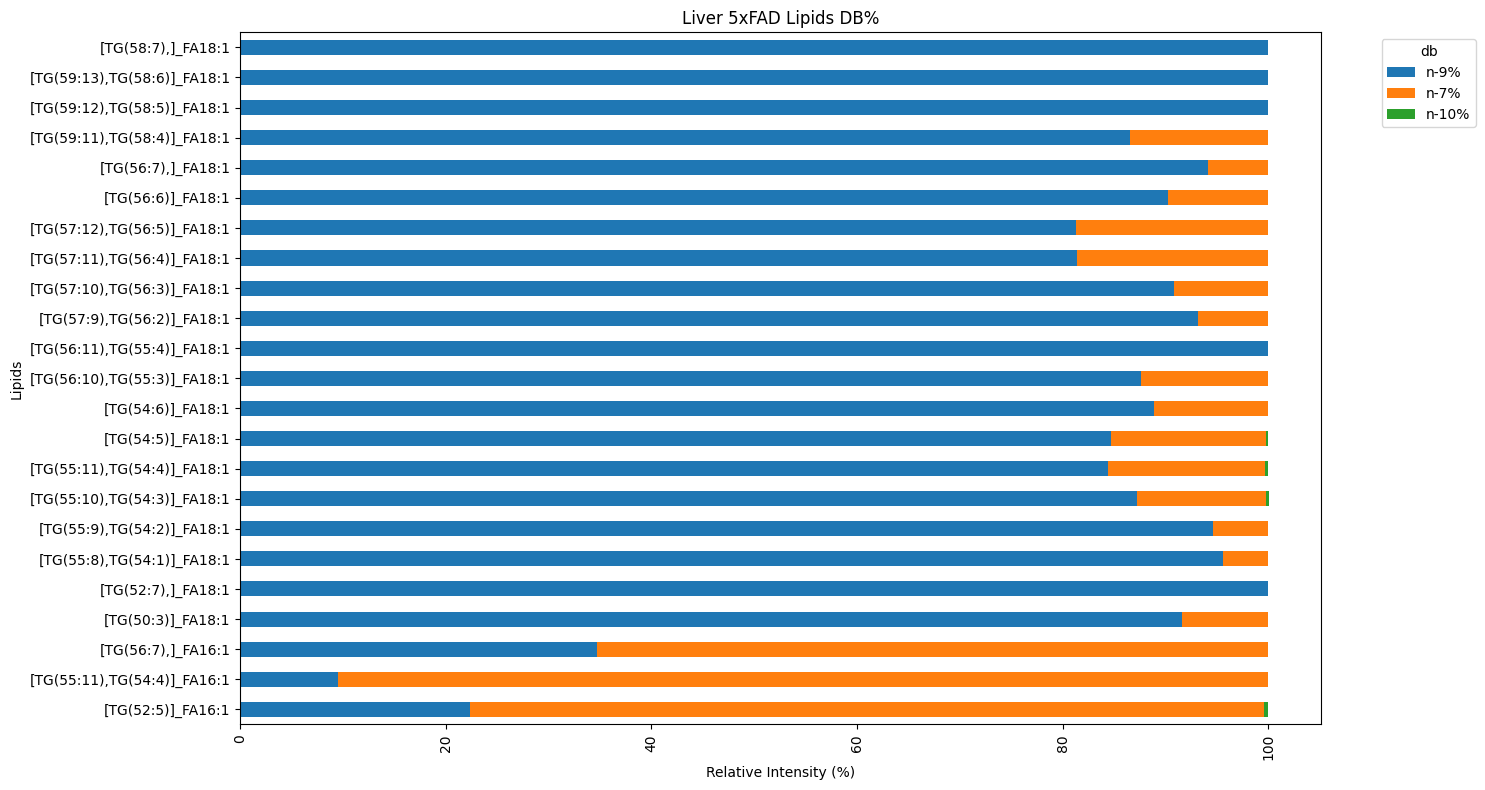

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_liver3 is your DataFrame
# df_liver3 = pd.read_csv('path_to_your_data.csv') # Uncomment and modify this line to load your data

# Reshaping the DataFrame
reshaped_df = df_liver3.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db', value_name='Percentage')


reshaped_df = reshaped_df[~reshaped_df['Lipid'].str.contains('FA18:2')]

reshaped_df


# Creating a pivot table
pivot_df = reshaped_df.pivot_table(index='Lipid', columns='db', values='Percentage', aggfunc='sum')

# ### SPECIAL CODE TO ADD KEY SORT FA16:1 FIRST and then DROP THE KEY
# # Create a sorting key
# pivot_df['Sort_Key'] = pivot_df.index.str.contains('FA16:1').astype(int)

# # Sort the DataFrame based on the sorting key
# pivot_df = pivot_df.sort_values(by='Sort_Key', ascending=False)

# # Drop the sorting key column
# pivot_df.drop('Sort_Key', axis=1, inplace=True)
# ###


# # Function to generate a sorting key from TG values while keeping the original Lipid name
# def tg_sort_key(lipid):
#     tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
#     tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))
#     return tg_list_sorted + lipid  # Concatenating the sorted TG values with the original lipid name


# # Apply the function to the Lipid index to create a sorting key
# pivot_df['TG_Sort_Key'] = pivot_df.index.to_series().apply(tg_sort_key)

# # Sort the DataFrame by the TG sorting key
# pivot_df = pivot_df.sort_values(by='TG_Sort_Key')

# # Drop the TG sorting key column
# pivot_df.drop('TG_Sort_Key', axis=1, inplace=True)
###############
# Function to generate a combined sorting key
def combined_sort_key(lipid):
    # Check if lipid contains 'FA16:1'
    fa16_1_key = '0' if 'FA16:1' in lipid else '1'  # '0' for FA16:1, '1' otherwise

    # Extract and sort TG values
    tg_list = re.findall(r'TG\(\d+:\d+\)', lipid)
    tg_list_sorted = ', '.join(sorted(tg_list, key=lambda x: [int(i) for i in x[3:-1].split(':')]))

    # Combine the keys
    return fa16_1_key + tg_list_sorted + lipid

# Apply the combined sorting function to the Lipid index to create a sorting key
pivot_df['Combined_Sort_Key'] = pivot_df.index.to_series().apply(combined_sort_key)

# Sort the DataFrame by the combined sorting key
pivot_df = pivot_df.sort_values(by='Combined_Sort_Key')

# Drop the combined sorting key column
pivot_df.drop('Combined_Sort_Key', axis=1, inplace=True)

# Reordering the columns to make n-9% appear first
# column_order = ['n-9%', 'n-7%', 'n-10%', 'n-12%']
column_order = ['n-9%', 'n-7%', 'n-10%']
pivot_df = pivot_df[column_order]
#delete FA18:2

pivot_df
# Plotting
fig, ax = plt.subplots(figsize=(15, 8))
pivot_df.plot(kind='barh', stacked=True, ax=ax)

ax.set_xlabel('Relative Intensity (%)')
ax.set_ylabel('Lipids')
ax.set_title('Liver 5xFAD Lipids DB%')
plt.xticks(rotation=90)

# Moving the legend outside of the plot
ax.legend(title='db', bbox_to_anchor=(1.05, 1), loc='upper left')

# Saving the plot as a PNG file
plt.savefig('Barstack_area/MAX/Liver_MAX_5xFAD.png', dpi=300, bbox_inches='tight')
#save as pdf
plt.savefig('Barstack_area/MAX/Liver_MAX_5xFAD.pdf', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()


Brain WT pipeline workflow

In [12]:
import pandas as pd

# Assuming df2 is your original DataFrame
# df2 = pd.read_csv('path_to_your_data.csv') # Uncomment and modify this line to load your data

# Filtering for WT Genotype
df_wt = df2[df2['Genotype'] == 'WT']

# Step 1: Filter for non-liver samples and rename to df_brain_wt
df_brain_wt = df_wt[df_wt['Biology'] != 'liver']

# Step 2: Create and fill n-7, n-9, n-10, n-12 columns in df_brain_wt
for col in ['n-7', 'n-9', 'n-10', 'n-12']:
    df_brain_wt[col] = df_brain_wt.apply(lambda x: x['OzESI_Intensity'] if x['db_pos'] == col else 0, axis=1)

# Step 3: Group by 'Lipid' and sum up the n columns in df_brain_wt2
df_brain_wt2 = df_brain_wt.groupby('Lipid')[['n-7', 'n-9', 'n-10', 'n-12']].sum().round(0).reset_index()

# Step 4: Calculate total intensity and relative intensities in df_brain_wt2
df_brain_wt2['Total Intensity'] = df_brain_wt2[['n-7', 'n-9', 'n-10', 'n-12']].sum(axis=1)

# Display the final DataFrame df_brain_wt2
df_brain_wt2


,Lipid,n-7,n-9,n-10,n-12,Total Intensity
0,[TG(52:5)]_FA16:1,792,0,0,0,792
1,[TG(54:5)]_FA18:1,0,811,0,0,811


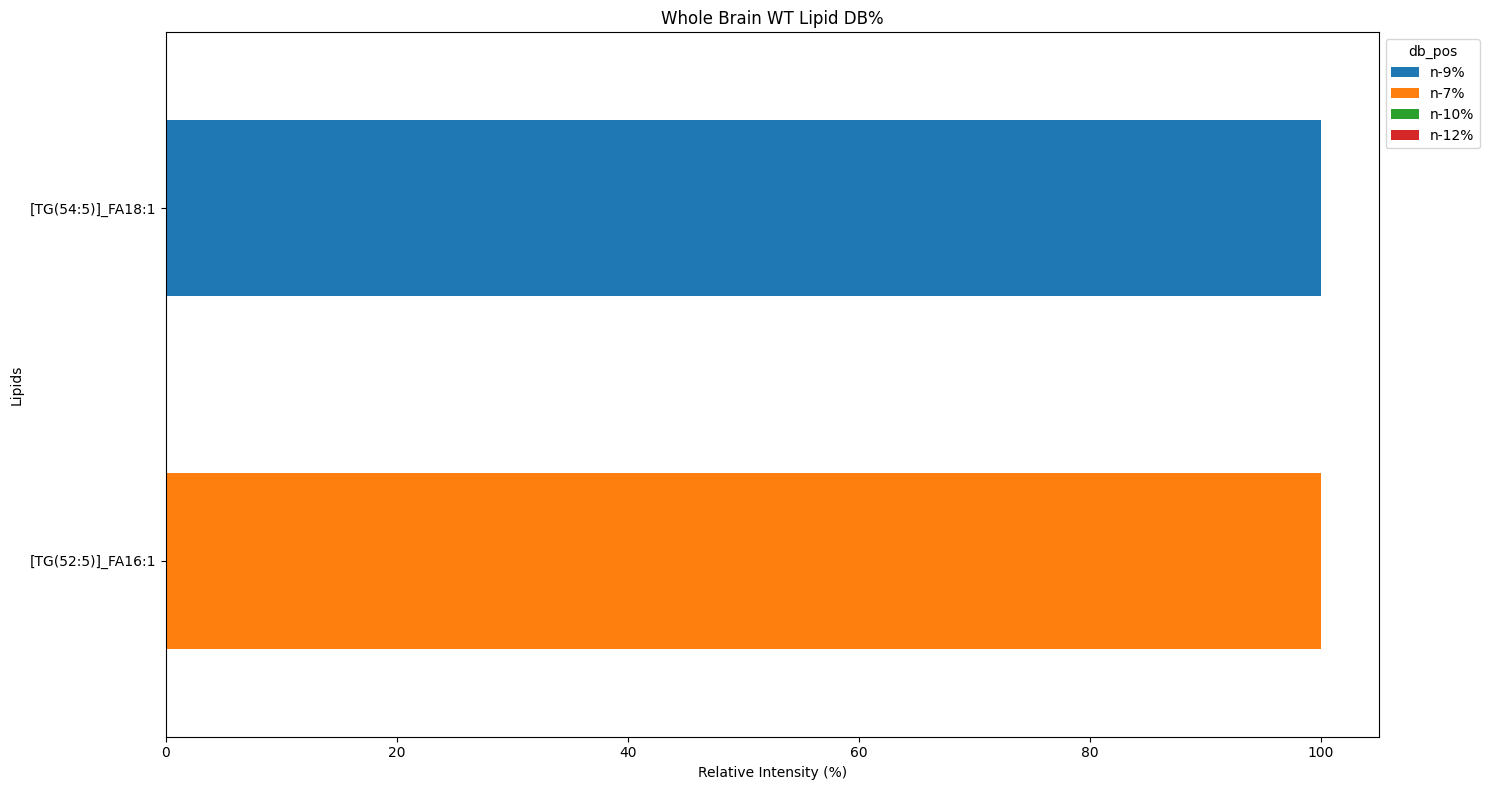

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_brain_wt3 is your DataFrame, a copy of df_brain_wt2
df_brain_wt3 = df_brain_wt2.copy()

# Calculate percentages for each column
for col in ['n-7', 'n-9', 'n-10', 'n-12']:
    df_brain_wt3[col + '%'] = ((df_brain_wt3[col] / df_brain_wt3['Total Intensity']) * 100).round(1)

# Reshape the DataFrame and create pivot table for plotting
reshaped_df = df_brain_wt3.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db_pos', value_name='Percentage')
pivot_df = reshaped_df.pivot_table(index='Lipid', columns='db_pos', values='Percentage', aggfunc='sum')[['n-9%', 'n-7%', 'n-10%', 'n-12%']]

# Create a sorting key based on the index (Lipid names) to bring FA16:1 lipids first
pivot_df['Sort_Key'] = pivot_df.index.str.contains('FA16:1').astype(int)

# Sort the DataFrame based on the sorting key
pivot_df = pivot_df.sort_values(by='Sort_Key', ascending=False)

# Drop the sorting key column
pivot_df.drop('Sort_Key', axis=1, inplace=True)

# Plotting
pivot_df.plot(kind='barh', stacked=True, figsize=(15, 8))
plt.xlabel('Relative Intensity (%)')
plt.ylabel('Lipids')
plt.title('Whole Brain WT Lipid DB%')
plt.legend(title='db_pos', loc='upper left', bbox_to_anchor=(1, 1))

# Saving the plot as a PNG file
plt.savefig('Barplot_OzON/Brain_Whole_WT.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


BRAIN Regions WT

In [14]:
import matplotlib.pyplot as plt

# Function to process and plot data for each brain region
def plot_brain_region_data(df, region_name):
    # Calculate percentages
    for col in ['n-7', 'n-9', 'n-10', 'n-12']:
        df[col + '%'] = ((df[col] / df['Total Intensity']) * 100).round(1)

    # Reshape the DataFrame
    reshaped_df = df.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db_pos', value_name='Percentage')

    # Create pivot table
    pivot_df = reshaped_df.pivot_table(index='Lipid', columns='db_pos', values='Percentage', aggfunc='sum')[['n-9%', 'n-7%', 'n-10%', 'n-12%']]

    # Sort lipids
    pivot_df['Sort_Key'] = pivot_df.index.str.contains('FA16:1').astype(int)
    pivot_df = pivot_df.sort_values(by='Sort_Key', ascending=False)
    pivot_df.drop('Sort_Key', axis=1, inplace=True)

    # Plotting
    pivot_df.plot(kind='barh', stacked=True, figsize=(15, 8))
    plt.xlabel('Relative Intensity (%)')
    plt.ylabel('Lipids')
    plt.title(f'{region_name} WT Lipid DB%')
    plt.legend(title='db_pos', loc='upper left', bbox_to_anchor=(1, 1))

    # Saving the plot as a PNG file
    plt.savefig(f'Barplot_OzON/{region_name}_Whole_WT.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

# Plot data for each brain region
plot_brain_region_data(df_brain_wt_cereb, 'Cerebellum')
plot_brain_region_data(df_brain_wt_hippo, 'Hippocampus')
plot_brain_region_data(df_brain_wt_cortex, 'Cortex')
plot_brain_region_data(df_brain_wt_dienc, 'Diencephalon')


NameError: name 'df_brain_wt_cereb' is not defined

In [37]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Function to process and plot data for a given DataFrame
# def plot_brain_region(df, region_name):
#     df_processed = df.copy()
#     for col in ['n-7', 'n-9', 'n-10', 'n-12']:
#         df_processed[col + '%'] = ((df_processed[col] / df_processed['Total Intensity']) * 100).round(1)

#     reshaped_df = df_processed.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db_pos', value_name='Percentage')
#     pivot_df = reshaped_df.pivot_table(index='Lipid', columns='db_pos', values='Percentage', aggfunc='sum')[['n-9%', 'n-7%', 'n-10%', 'n-12%']]

#     pivot_df.plot(kind='barh', stacked=True, figsize=(15, 8))
#     plt.xlabel('Relative Intensity (%)')
#     plt.ylabel('Lipids')
#     plt.title(f'{region_name} WT Lipid DB%')
#     plt.legend(title='db_pos', loc='upper left', bbox_to_anchor=(1, 1))

#     plt.savefig(f'Barplot_OzON/Brain_{region_name}_WT.png', dpi=300, bbox_inches='tight')
#     plt.tight_layout()
#     plt.show()

# # Applying the function to each brain region DataFrame
# plot_brain_region(df_brain_wt_cereb, 'Cereb')
# plot_brain_region(df_brain_wt_hippo, 'Hippo')
# plot_brain_region(df_brain_wt_cortex, 'Cortex')
# plot_brain_region(df_brain_wt_dienc, 'Dienc')


Whole Brain 5xFAD pipeline 5xFAD 5xFAD 5xFAD 5xFAD 5xFAD 5xFAD 5xFAD 5xFAD 5xFAD 5xFAD 5xFAD 5xFAD 5xFAD 5xFAD 5xFAD

In [41]:
import pandas as pd

# Assuming df2 is your original DataFrame
# df2 = pd.read_csv('path_to_your_data.csv') # Uncomment and modify this line to load your data

# Filtering for 5xFAD Genotype
df_5xFAD = df2[df2['Genotype'] == '5xFAD']

# Step 1: Filter for non-liver samples and rename to df_brain_5xFAD
df_brain_5xFAD = df_5xFAD[df_5xFAD['Biology'] != 'liver']

# Step 2: Create and fill n-7, n-9, n-10, n-12 columns in df_brain_5xFAD
for col in ['n-7', 'n-9', 'n-10', 'n-12']:
    df_brain_5xFAD[col] = df_brain_5xFAD.apply(lambda x: x['OzESI_Intensity'] if x['db_pos'] == col else 0, axis=1)

# Step 3: Group by 'Lipid' and sum up the n columns in df_brain_5xFAD2
df_brain_5xFAD2 = df_brain_5xFAD.groupby('Lipid')[['n-7', 'n-9', 'n-10', 'n-12']].sum().round(0).reset_index()

# Step 4: Calculate total intensity and relative intensities in df_brain_5xFAD2
df_brain_5xFAD2['Total Intensity'] = df_brain_5xFAD2[['n-7', 'n-9', 'n-10', 'n-12']].sum(axis=1)

# Display the final DataFrame df_brain_5xFAD2
df_brain_5xFAD2


/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Lipid,n-7,n-9,n-10,n-12,Total Intensity
0,[TG(50:3)]_FA18:1,0.0,20721.0,0.0,0,20721.0
1,[TG(52:5)]_FA16:1,167770.0,11761.0,0.0,0,179531.0
2,[TG(54:5)]_FA18:1,14441.0,182317.0,0.0,0,196758.0
3,[TG(54:6)]_FA18:1,518.0,11183.0,0.0,0,11701.0
4,"[TG(55:10),TG(54:3)]_FA18:1",5920.0,242567.0,0.0,0,248487.0
5,"[TG(55:11),TG(54:4)]_FA18:1",43029.0,422731.0,0.0,0,465760.0
6,"[TG(55:9),TG(54:2)]_FA18:1",3402.0,76254.0,707.0,0,80363.0
7,"[TG(56:7),TG(55:0)]_FA18:1",0.0,1801.0,0.0,0,1801.0


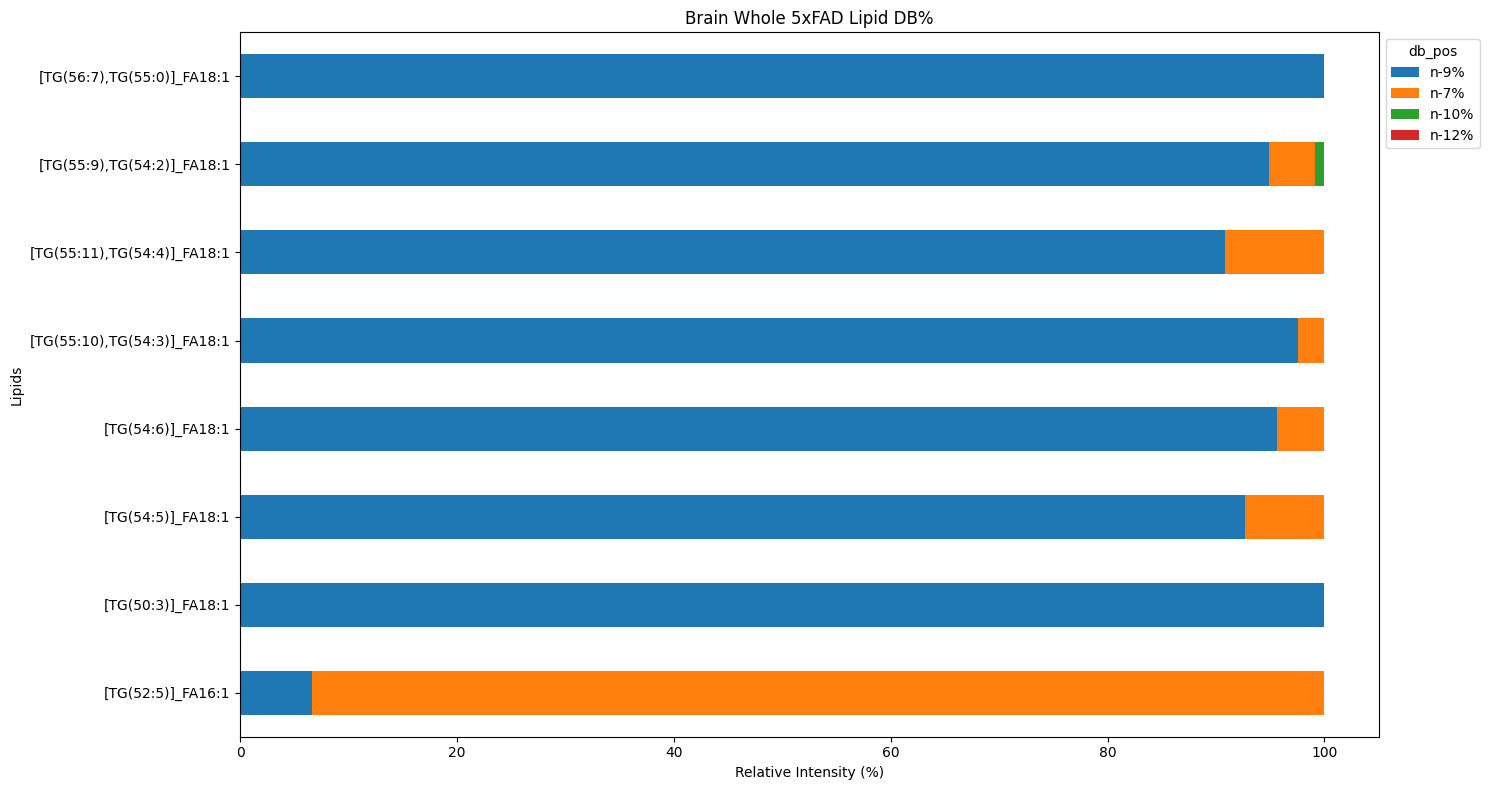

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Copy df_brain_5xFAD2 and calculate percentage columns
df_brain_5xFAD3 = df_brain_5xFAD2.copy()
for col in ['n-7', 'n-9', 'n-10', 'n-12']:
    df_brain_5xFAD3[col + '%'] = ((df_brain_5xFAD3[col] / df_brain_5xFAD3['Total Intensity']) * 100).round(1)



# Reshape the DataFrame and create pivot table for plotting
reshaped_df_5xFAD = df_brain_5xFAD3.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db_pos', value_name='Percentage')
pivot_df_5xFAD = reshaped_df_5xFAD.pivot_table(index='Lipid', columns='db_pos', values='Percentage', aggfunc='sum')[['n-9%', 'n-7%', 'n-10%', 'n-12%']]

# Sort lipids
pivot_df_5xFAD['Sort_Key'] = pivot_df_5xFAD.index.str.contains('FA16:1').astype(int)
pivot_df_5xFAD = pivot_df_5xFAD.sort_values(by='Sort_Key', ascending=False)
pivot_df_5xFAD.drop('Sort_Key', axis=1, inplace=True)

# Plotting
pivot_df_5xFAD.plot(kind='barh', stacked=True, figsize=(15, 8))
plt.xlabel('Relative Intensity (%)')
plt.ylabel('Lipids')
plt.title('Brain Whole 5xFAD Lipid DB%')
plt.legend(title='db_pos', loc='upper left', bbox_to_anchor=(1, 1))

# Saving the plot as a PNG file
plt.savefig('Barplot_OzON/Brain_Whole_5xFAD.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


Brain REGIONS 5xFAD

In [34]:
import pandas as pd

# Assuming df2 is your original DataFrame
# df2 = pd.read_csv('path_to_your_data.csv') # Uncomment and modify this line to load your data

# Filtering for 5xFAD Genotype
df_5xFAD = df2[df2['Genotype'] == '5xFAD']

# Function to process data for each brain region
def process_brain_region_5xFAD(df, region):
    df_region = df[df['Biology'] == region]
    for col in ['n-7', 'n-9', 'n-10', 'n-12']:
        df_region[col] = df_region.apply(lambda x: x['OzESI_Intensity'] if x['db_pos'] == col else 0, axis=1)
    df_region_grouped = df_region.groupby('Lipid')[['n-7', 'n-9', 'n-10', 'n-12']].sum().round(0).reset_index()
    df_region_grouped['Total Intensity'] = df_region_grouped[['n-7', 'n-9', 'n-10', 'n-12']].sum(axis=1)
    return df_region_grouped

# Processing data for each brain region in 5xFAD
df_brain_5xFAD_cereb = process_brain_region_5xFAD(df_5xFAD, 'cereb')
df_brain_5xFAD_hippo = process_brain_region_5xFAD(df_5xFAD, 'hippo')
df_brain_5xFAD_cortex = process_brain_region_5xFAD(df_5xFAD, 'cortex')
df_brain_5xFAD_dienc = process_brain_region_5xFAD(df_5xFAD, 'dienc')

# Display one of the final DataFrames (e.g., for cereb)
df_brain_5xFAD_cereb


/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Lipid,n-7,n-9,n-10,n-12,Total Intensity
0,[TG(50:3)]_FA18:1,0.0,6686.0,0.0,0,6686.0
1,[TG(52:5)]_FA16:1,90754.0,7205.0,0.0,0,97959.0
2,[TG(54:5)]_FA18:1,6599.0,87139.0,0.0,0,93738.0
3,[TG(54:6)]_FA18:1,518.0,5958.0,0.0,0,6476.0
4,"[TG(55:10),TG(54:3)]_FA18:1",2816.0,85928.0,0.0,0,88744.0
5,"[TG(55:11),TG(54:4)]_FA18:1",23965.0,208137.0,0.0,0,232102.0
6,"[TG(55:9),TG(54:2)]_FA18:1",2466.0,33699.0,707.0,0,36872.0
7,"[TG(56:7),TG(55:0)]_FA18:1",0.0,1143.0,0.0,0,1143.0


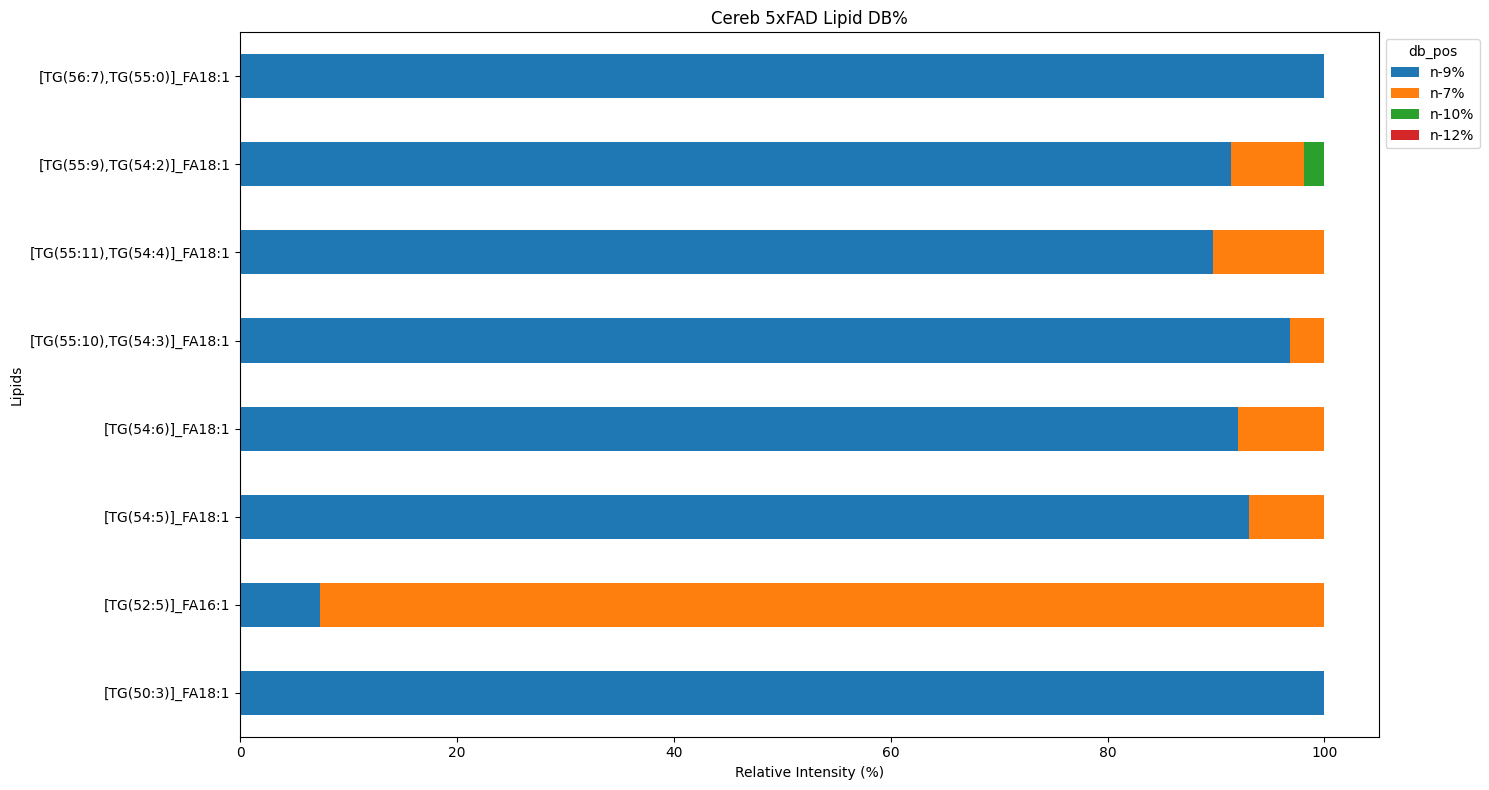

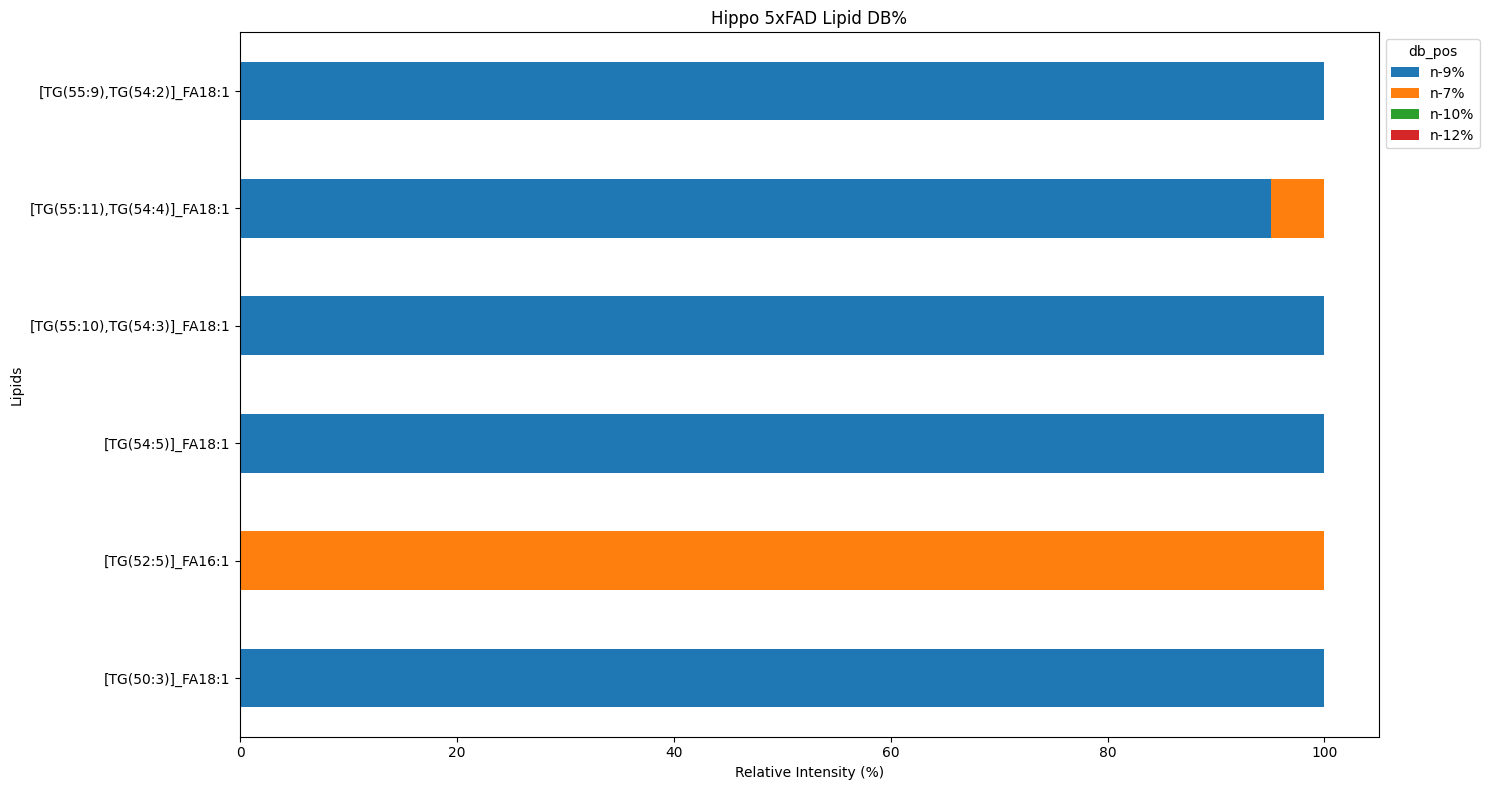

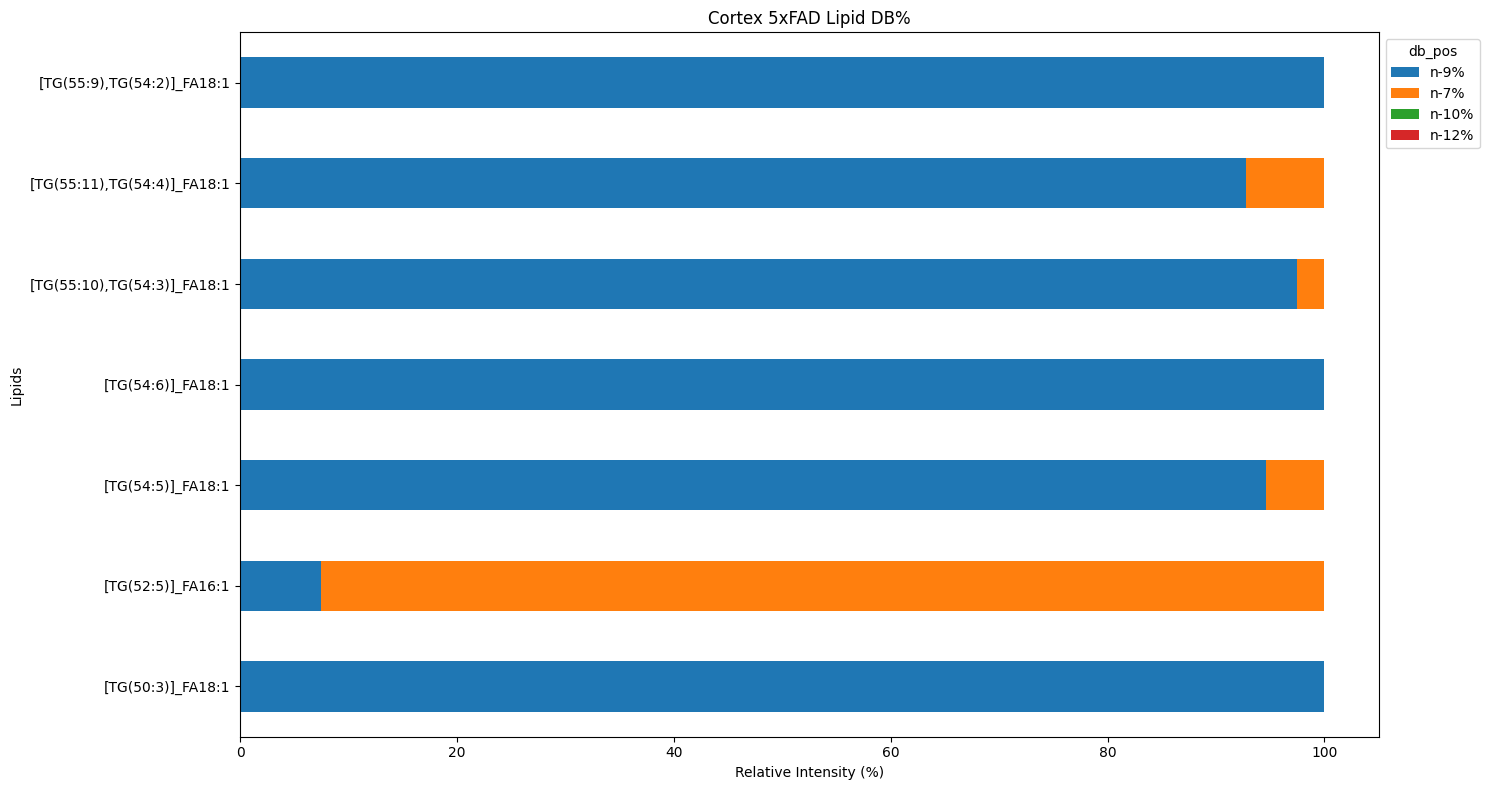

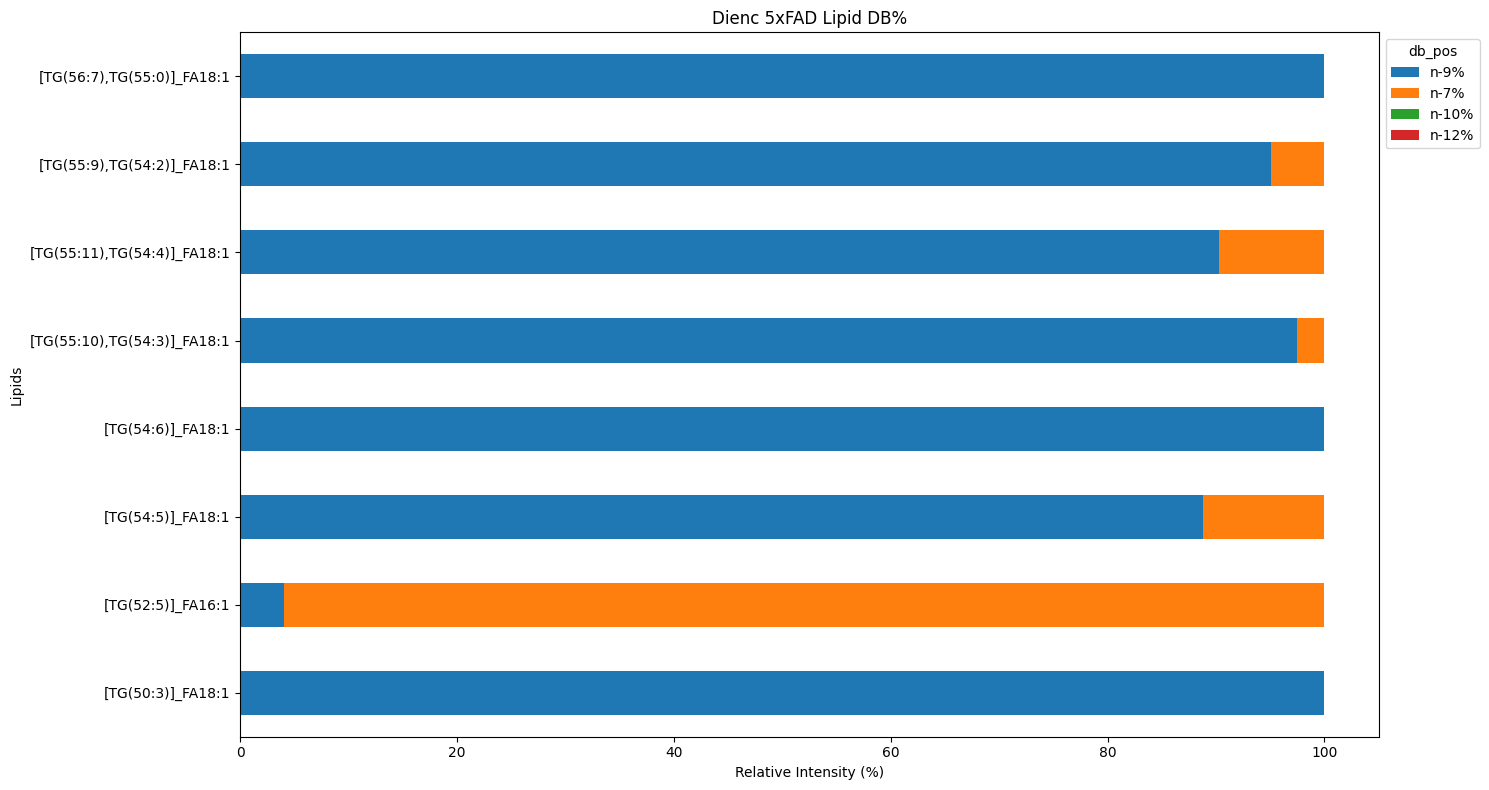

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to process and plot data for a given DataFrame (5xFAD)
def plot_brain_region_5xFAD(df, region_name):
    df_processed = df.copy()
    for col in ['n-7', 'n-9', 'n-10', 'n-12']:
        df_processed[col + '%'] = ((df_processed[col] / df_processed['Total Intensity']) * 100).round(1)

    reshaped_df = df_processed.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db_pos', value_name='Percentage')
    pivot_df = reshaped_df.pivot_table(index='Lipid', columns='db_pos', values='Percentage', aggfunc='sum')[['n-9%', 'n-7%', 'n-10%', 'n-12%']]

    pivot_df.plot(kind='barh', stacked=True, figsize=(15, 8))
    plt.xlabel('Relative Intensity (%)')
    plt.ylabel('Lipids')
    plt.title(f'{region_name} 5xFAD Lipid DB%')
    plt.legend(title='db_pos', loc='upper left', bbox_to_anchor=(1, 1))

    plt.savefig(f'Barplot_OzON/Brain_{region_name}_5xFAD.png', dpi=300, bbox_inches='tight')
    plt.tight_layout()
    plt.show()

# Applying the function to each brain region DataFrame for 5xFAD
plot_brain_region_5xFAD(df_brain_5xFAD_cereb, 'Cereb')
plot_brain_region_5xFAD(df_brain_5xFAD_hippo, 'Hippo')
plot_brain_region_5xFAD(df_brain_5xFAD_cortex, 'Cortex')
plot_brain_region_5xFAD(df_brain_5xFAD_dienc, 'Dienc')


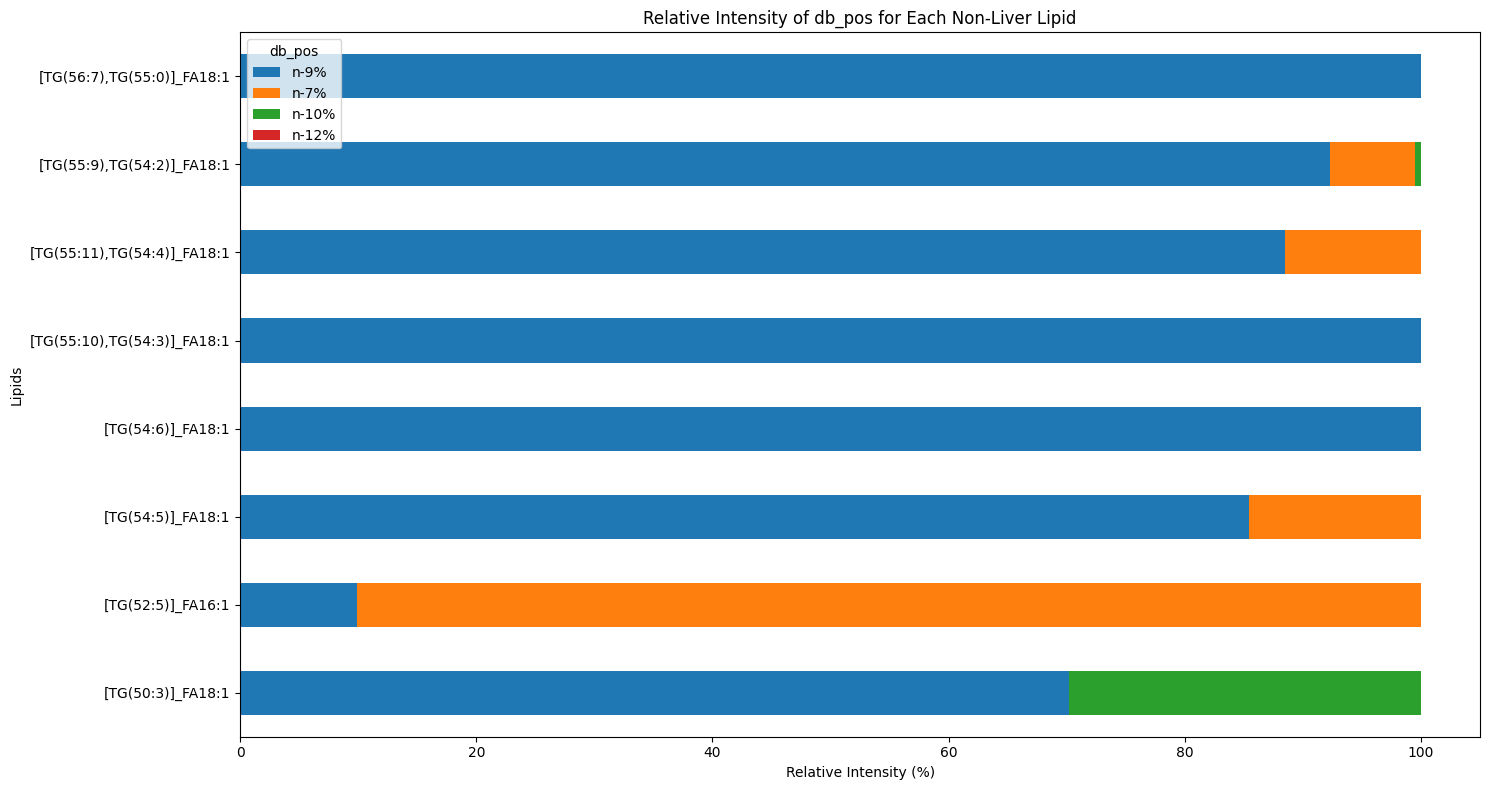

/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


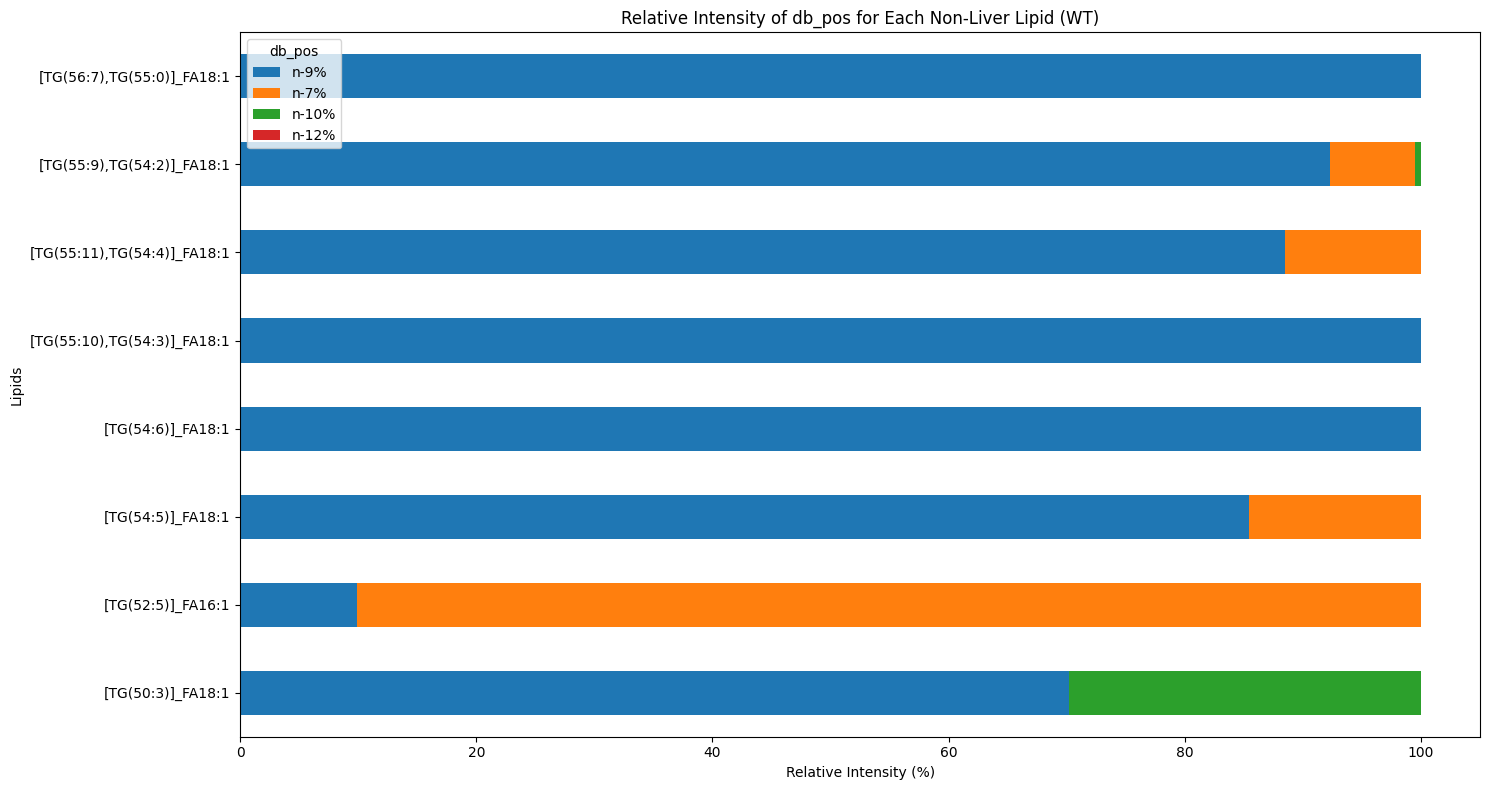

/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


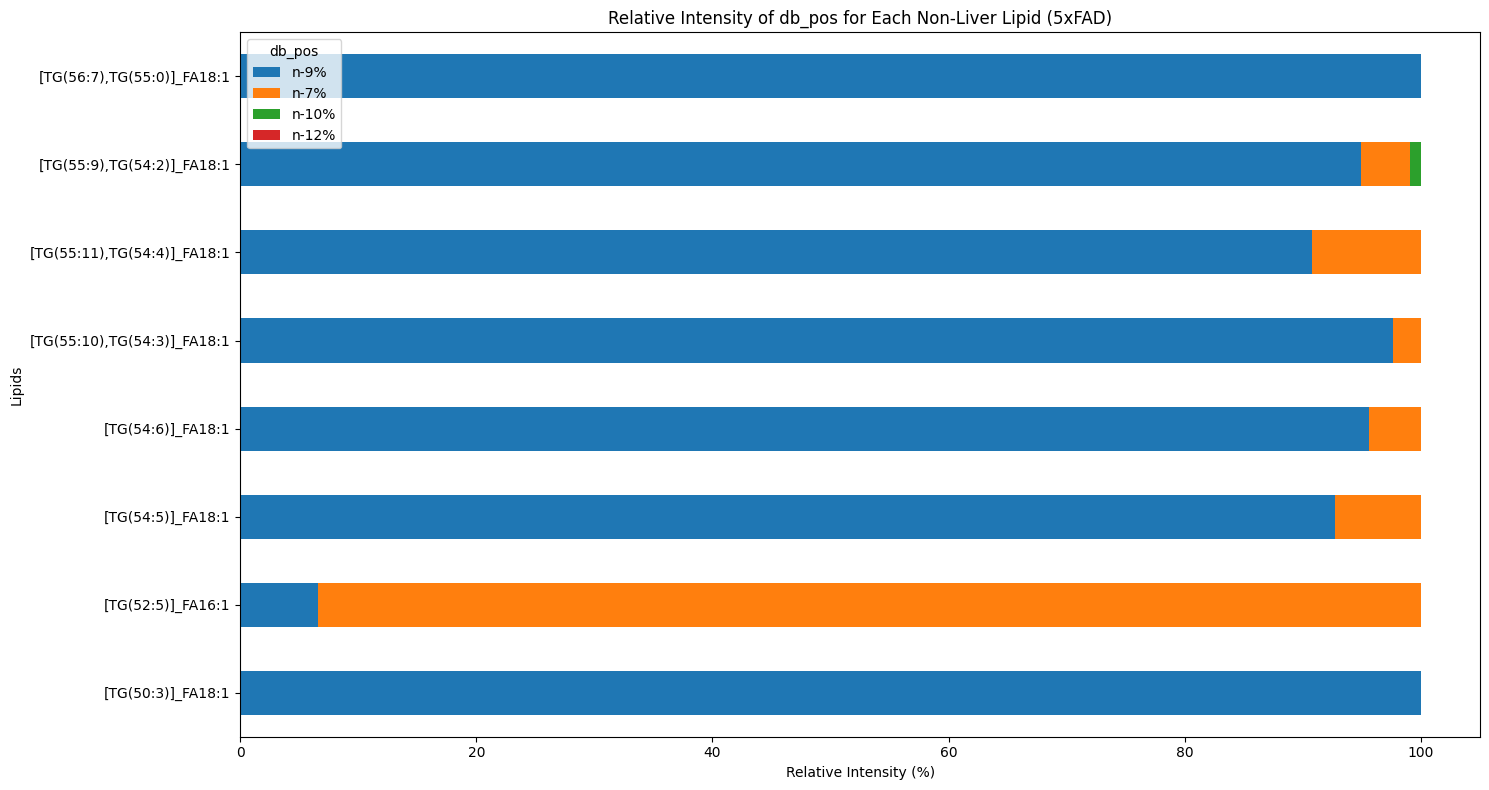

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df2 is your original DataFrame
# df2 = pd.read_csv('path_to_your_data.csv') # Uncomment and modify this line to load your data

# Function to create the pipeline for a specific genotype
def create_pipeline_and_plot(df, genotype, title):
    # Filtering for non-liver samples of the specified genotype
    df_genotype = df[(df['Biology'] != 'liver') & (df['Genotype'] == genotype)]

    # Creating and filling n-7, n-9, n-10, n-12 columns
    for col in ['n-7', 'n-9', 'n-10', 'n-12']:
        df_genotype[col] = df_genotype.apply(lambda x: x['OzESI_Intensity'] if x['db_pos'] == col else 0, axis=1)

    # Grouping by 'Lipid' and summing up the n columns
    df_genotype2 = df_genotype.groupby('Lipid')[['n-7', 'n-9', 'n-10', 'n-12']].sum().round(0).reset_index()

    # Calculating total intensity and relative intensities
    df_genotype2['Total Intensity'] = df_genotype2[['n-7', 'n-9', 'n-10', 'n-12']].sum(axis=1)
    df_genotype3 = df_genotype2.copy()
    for col in ['n-7', 'n-9', 'n-10', 'n-12']:
        df_genotype3[col + '%'] = ((df_genotype3[col] / df_genotype3['Total Intensity']) * 100).round(1)

    # Reshaping the DataFrame and creating pivot table for plotting
    reshaped_df = df_genotype3.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db_pos', value_name='Percentage')
    pivot_df = reshaped_df.pivot_table(index='Lipid', columns='db_pos', values='Percentage', aggfunc='sum')[['n-9%', 'n-7%', 'n-10%', 'n-12%']]

    # Plotting
    pivot_df.plot(kind='barh', stacked=True, figsize=(15, 8))
    plt.xlabel('Relative Intensity (%)')
    plt.ylabel('Lipids')
    plt.title(title)
    plt.legend(title='db_pos')
    plt.tight_layout()
    plt.show()

# Creating plot for WT genotype
create_pipeline_and_plot(df2, 'WT', 'Relative Intensity of db_pos for Each Non-Liver Lipid (WT)')

# Creating plot for 5xFAD genotype
create_pipeline_and_plot(df2, '5xFAD', 'Relative Intensity of db_pos for Each Non-Liver Lipid (5xFAD)')


Brain REGIONS 5xfad vs WT

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df2 is your original DataFrame
# df2 = pd.read_csv('path_to_your_data.csv') # Uncomment and modify this line to load your data

# List of brain regions and genotypes
brain_regions = ['region1', 'region2', 'region3', 'region4']
genotypes = ['WT', '5xFAD']

# Function to create the pipeline and plot for a specific brain region and genotype
def create_pipeline_and_plot(df, region, genotype, title):
    # Filtering for the specific brain region and genotype
    df_filtered = df[(df['Biology'] == region) & (df['Genotype'] == genotype)]

    # Rest of the pipeline here (similar to previous steps)

# Looping through each combination of brain region and genotype
for region in brain_regions:
    for genotype in genotypes:
        title = f'Relative Intensity of db_pos for {region} ({genotype})'
        create_pipeline_and_plot(df2, region, genotype, title)


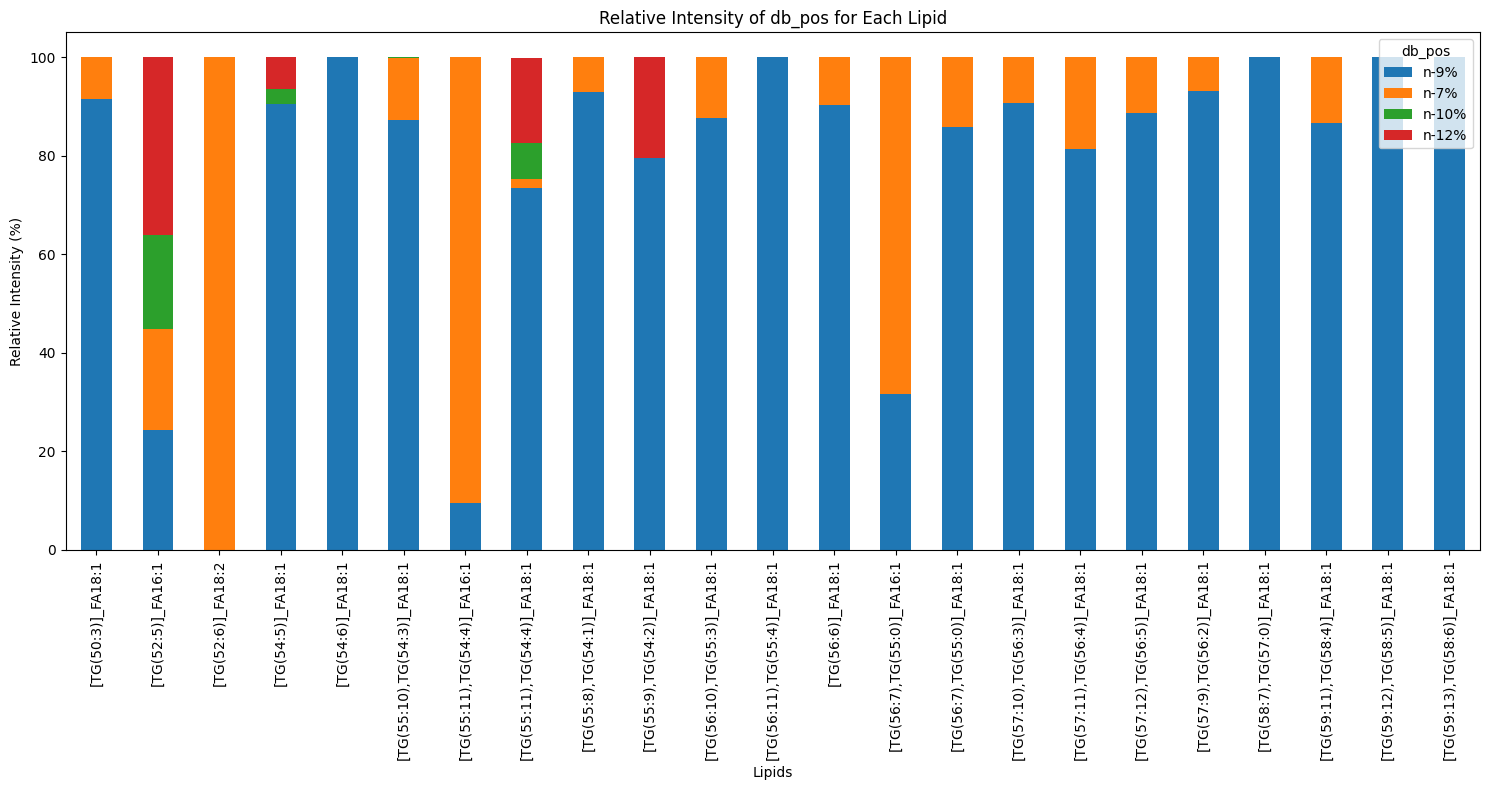

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_liver3 is your DataFrame
# df_liver3 = pd.read_csv('path_to_your_data.csv') # Uncomment and modify this line to load your data

# Reshaping the DataFrame
reshaped_df = df_liver3.melt(id_vars='Lipid', value_vars=['n-7%', 'n-9%', 'n-10%', 'n-12%'], var_name='db_pos', value_name='Percentage')

# Creating a pivot table
pivot_df = reshaped_df.pivot_table(index='Lipid', columns='db_pos', values='Percentage', aggfunc='sum')

# Reordering the columns to make n-9% appear first
column_order = ['n-9%', 'n-7%', 'n-10%', 'n-12%']
pivot_df = pivot_df[column_order]

# Plotting
pivot_df.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.xlabel('Lipids')
plt.ylabel('Relative Intensity (%)')
plt.title('Relative Intensity of db_pos for Each Lipid')
plt.xticks(rotation=90)
plt.legend(title='db_pos')

plt.tight_layout()
plt.show()


In [43]:
# Filtering for unique combinations of Biology = liver and Genotype = 5xFAD
liver_5xFAD = df[df['Biology'] == 'liver'][df['Genotype'] == '5xFAD']
unique_combos_liver_5xFAD = liver_5xFAD[['Lipid', 'Sample_ID']].drop_duplicates()

# Filtering for unique combinations of Biology = liver and Genotype = WT
liver_WT = df[df['Biology'] == 'liver'][df['Genotype'] == 'WT']
unique_combos_liver_WT = liver_WT[['Lipid', 'Sample_ID']].drop_duplicates()

#print len(unique_combos_liver_5xFAD), len(unique_combos_liver_WT)
print(len(unique_combos_liver_5xFAD), len(unique_combos_liver_WT))

105 0


/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [29]:
df3 = df2.copy()



# Displaying the first few rows of df3
df3.head()

TypeError: '<' not supported between instances of 'str' and 'int'

Pivot tables

Liver pivot table

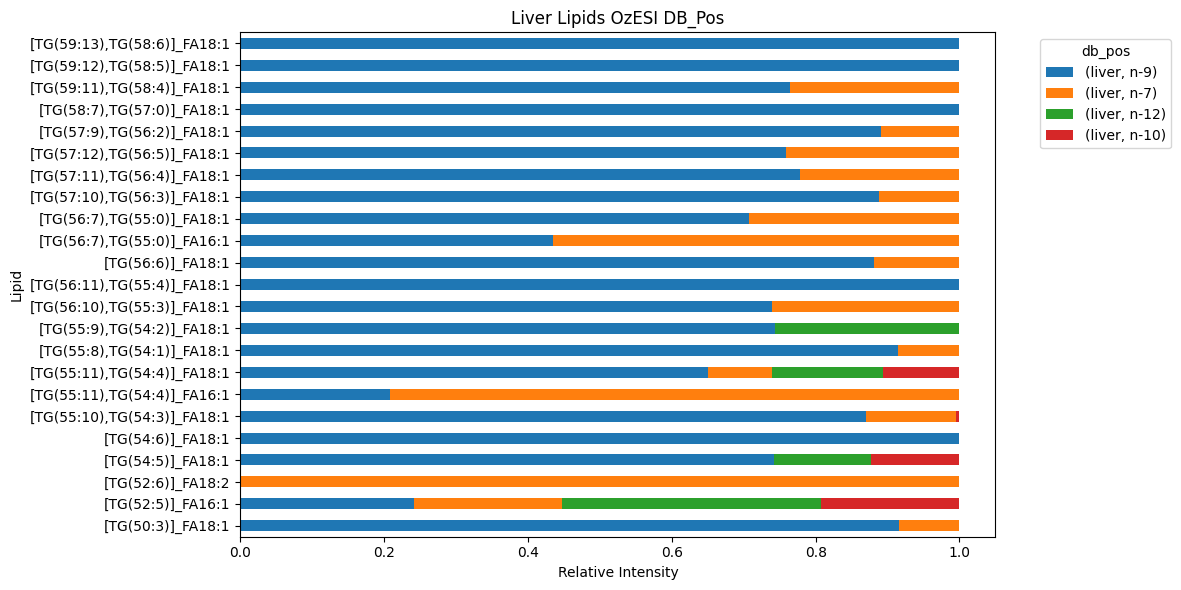

In [19]:
# Updating the pivot table to include 'db_pos' for stacking
pivot_liver_stacked_df = liver_df.pivot_table(index='Lipid', columns=['Biology', 'db_pos'], values='OzESI_Intensity', fill_value=0)

# Normalizing the OzESI Intensity within each lipid (making it relative)
pivot_liver_stacked_normalized_df = pivot_liver_stacked_df.div(pivot_liver_stacked_df.sum(axis=1), axis=0)

# Sorting the columns so that 'n-9' comes first in the stacking order
sorted_columns = sorted(pivot_liver_stacked_normalized_df.columns, reverse=True)
pivot_liver_stacked_normalized_sorted_df = pivot_liver_stacked_normalized_df[sorted_columns]

# Plotting the stacked bar plot with normalized intensities and reordered stacking
pivot_liver_stacked_normalized_sorted_df.plot(kind='barh', stacked=True, figsize=(12, 6))
plt.xlabel('Relative Intensity')
plt.ylabel('Lipid')
plt.title('Liver Lipids OzESI DB_Pos')
plt.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


# Saving the plot with the file name the same as the plot title
plot_filename = 'Barplot_OzON/Liver Lipids OzESI DB_Pos.png'
plt.savefig(plot_filename)
plt.show()



brain pivot table

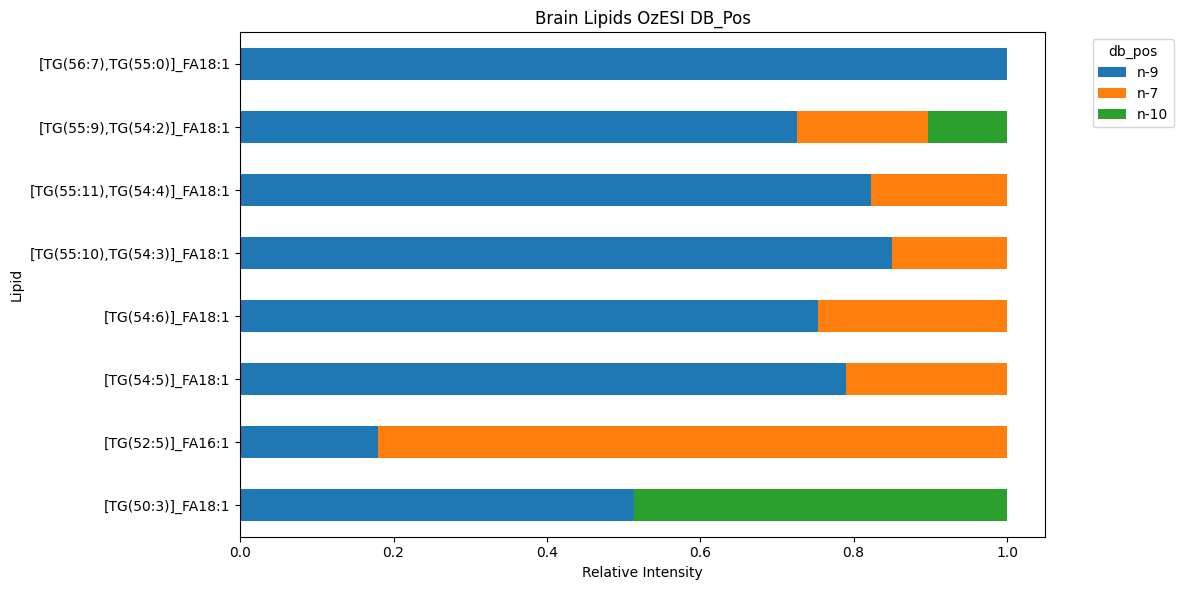

In [18]:

# Filtering the DataFrame to exclude 'Biology' as 'liver'
brain_df = df[~df['Sample_ID'].str.contains('liver')]

# Pivoting the data for the non-liver samples with stacking by 'db_pos'
pivot_brain_stacked_df = brain_df.pivot_table(index='Lipid', columns='db_pos', values='OzESI_Intensity', fill_value=0)

# Normalizing the OzESI Intensity within each lipid for non-liver samples (making it relative)
pivot_brain_stacked_normalized_df = pivot_brain_stacked_df.div(pivot_brain_stacked_df.sum(axis=1), axis=0)


# Sorting the columns for the non-liver samples so that 'n-9' comes first in the stacking order
sorted_columns_non_liver = sorted(pivot_brain_stacked_normalized_df.columns, reverse=True)
pivot_brain_stacked_normalized_sorted_df = pivot_brain_stacked_normalized_df[sorted_columns_non_liver]

# Plotting the stacked bar plot with normalized intensities and reordered stacking for non-liver samples
pivot_brain_stacked_normalized_sorted_df.plot(kind='barh', stacked=True, figsize=(12, 6))
plt.xlabel('Relative Intensity')
plt.ylabel('Lipid')
plt.title('Brain Lipids OzESI DB_Pos')
plt.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Saving the plot with the file name the same as the plot title
plot_filename = 'Barplot_OzON/Brain Lipids OzESI DB_Pos.png'
plt.savefig(plot_filename)
plt.show()

Each brain region separately

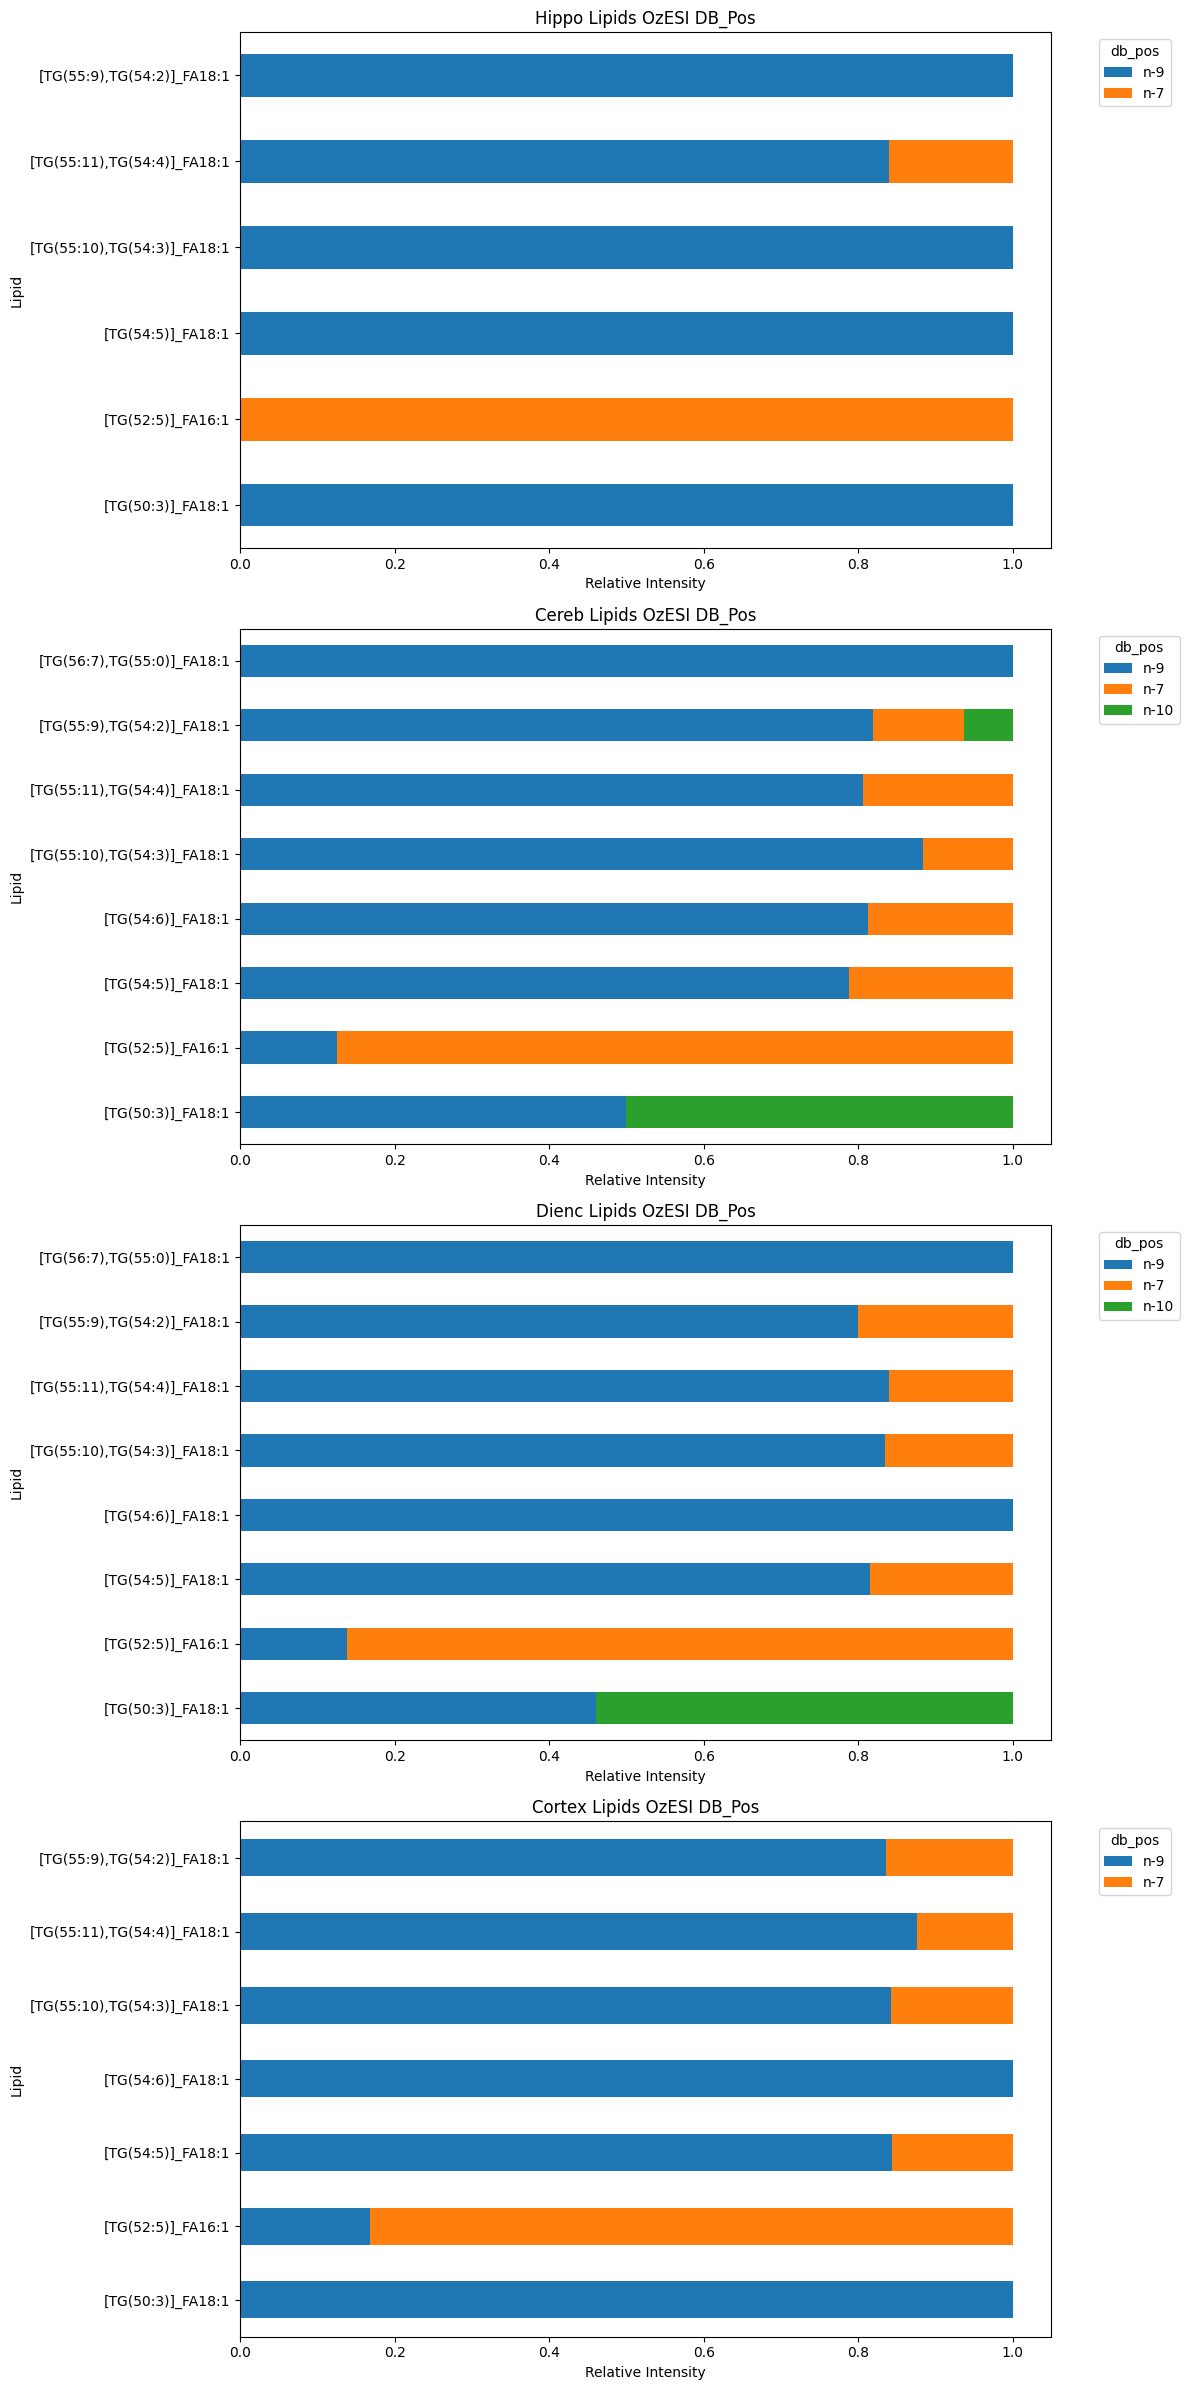

In [24]:
# Filtering the DataFrame to exclude samples containing 'liver' in their Sample_ID
brain_df = df[~df['Sample_ID'].str.contains('liver')]

# Extracting unique brain regions from Sample_ID
brain_regions = ['hippo', 'cereb', 'dienc', 'cortex']  # Example regions, adjust according to your data

# Creating a figure and axes for subplots
fig, axes = plt.subplots(len(brain_regions), 1, figsize=(12, 6 * len(brain_regions)))

for i, region in enumerate(brain_regions):
    # Filtering the DataFrame for the specific brain region
    region_df = brain_df[brain_df['Sample_ID'].str.contains(region)]

    # Pivoting the data for the specific brain region with stacking by 'db_pos'
    pivot_region_stacked_df = region_df.pivot_table(index='Lipid', columns='db_pos', values='OzESI_Intensity', fill_value=0)

    # Normalizing the OzESI Intensity within each lipid for the specific brain region (making it relative)
    pivot_region_stacked_normalized_df = pivot_region_stacked_df.div(pivot_region_stacked_df.sum(axis=1), axis=0)

    # Sorting the columns for the specific brain region so that 'n-9' comes first in the stacking order
    sorted_columns_region = sorted(pivot_region_stacked_normalized_df.columns, reverse=True)
    pivot_region_stacked_normalized_sorted_df = pivot_region_stacked_normalized_df[sorted_columns_region]

    # Plotting the stacked bar plot for the specific brain region
    ax = axes[i]
    pivot_region_stacked_normalized_sorted_df.plot(kind='barh', stacked=True, ax=ax)
    ax.set_title(f'{region.capitalize()} Lipids OzESI DB_Pos')
    ax.set_xlabel('Relative Intensity')
    ax.set_ylabel('Lipid')
    ax.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    

# # Saving the plot with the file name including the brain region
# plot_filename = f'Barplot_OzON/{region.capitalize()} Lipids OzESI DB_Pos.png'
# Saving the plot with the file name including the brain region
plot_filename = f'Barplot_OzON/AllBrainRegions Lipids OzESI DB_Pos.png'
plt.savefig(plot_filename)

plt.show()

In [25]:
import matplotlib.pyplot as plt
import os

# Directory where plots will be saved
plot_directory = 'Barplot_OzON'

# Check if the directory exists, and create it if it does not
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

for region in brain_regions:
    # Filtering the DataFrame for the specific brain region
    region_df = brain_df[brain_df['Sample_ID'].str.contains(region)]

    # Pivoting the data for the specific brain region with stacking by 'db_pos'
    pivot_region_stacked_df = region_df.pivot_table(index='Lipid', columns='db_pos', values='OzESI_Intensity', fill_value=0)

    # Normalizing the OzESI Intensity within each lipid for the specific brain region (making it relative)
    pivot_region_stacked_normalized_df = pivot_region_stacked_df.div(pivot_region_stacked_df.sum(axis=1), axis=0)

    # Sorting the columns for the specific brain region so that 'n-9' comes first in the stacking order
    sorted_columns_region = sorted(pivot_region_stacked_normalized_df.columns, reverse=True)
    pivot_region_stacked_normalized_sorted_df = pivot_region_stacked_normalized_df[sorted_columns_region]

    # Creating a new figure for each brain region
    plt.figure(figsize=(12, 6))

    # Plotting the stacked bar plot for the specific brain region
    pivot_region_stacked_normalized_sorted_df.plot(kind='barh', stacked=True)
    plt.title(f'{region.capitalize()} Lipids OzESI DB_Pos')
    plt.xlabel('Relative Intensity')
    plt.ylabel('Lipid')
    plt.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    # Saving the plot with the file name including the brain region
    plot_filename = os.path.join(plot_directory, f'{region.capitalize()} Lipids OzESI DB_Pos.png')
    plt.savefig(plot_filename)

    # Clear the current plot to prepare for the next one
    plt.clf()


<Figure size 1200x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 640x480 with 0 Axes>

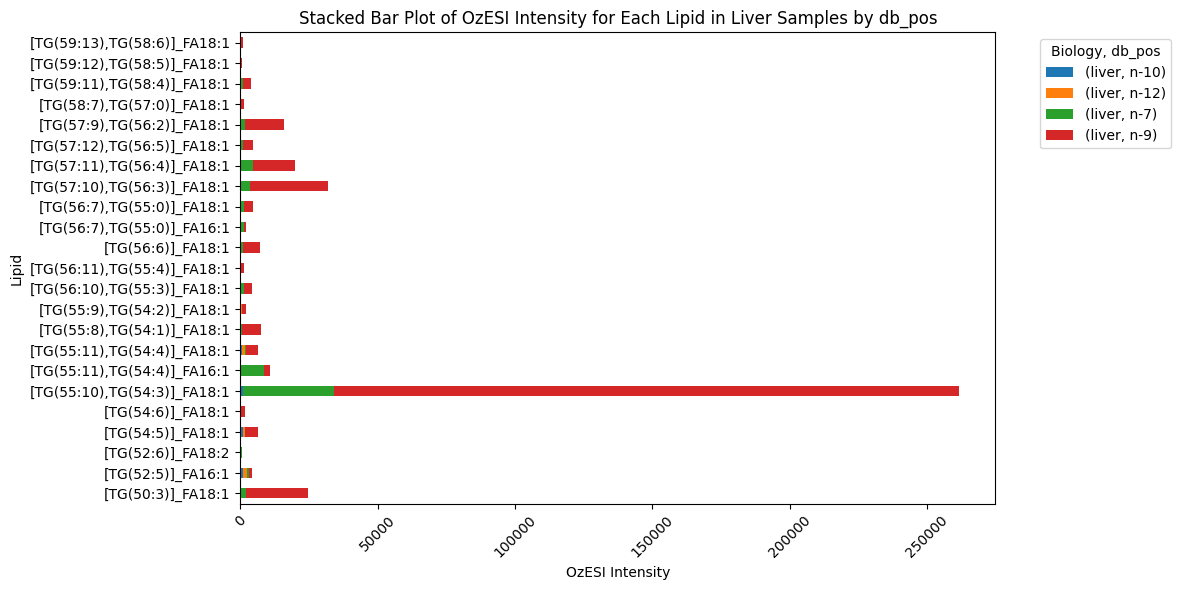

In [25]:


# Plotting the stacked bar plot
pivot_liver_stacked_df.plot(kind='barh', stacked=True, figsize=(12, 6))
plt.xlabel('OzESI Intensity')
plt.ylabel('Lipid')
plt.title('Stacked Bar Plot of OzESI Intensity for Each Lipid in Liver Samples by db_pos')
plt.xticks(rotation=45)
plt.legend(title='Biology, db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


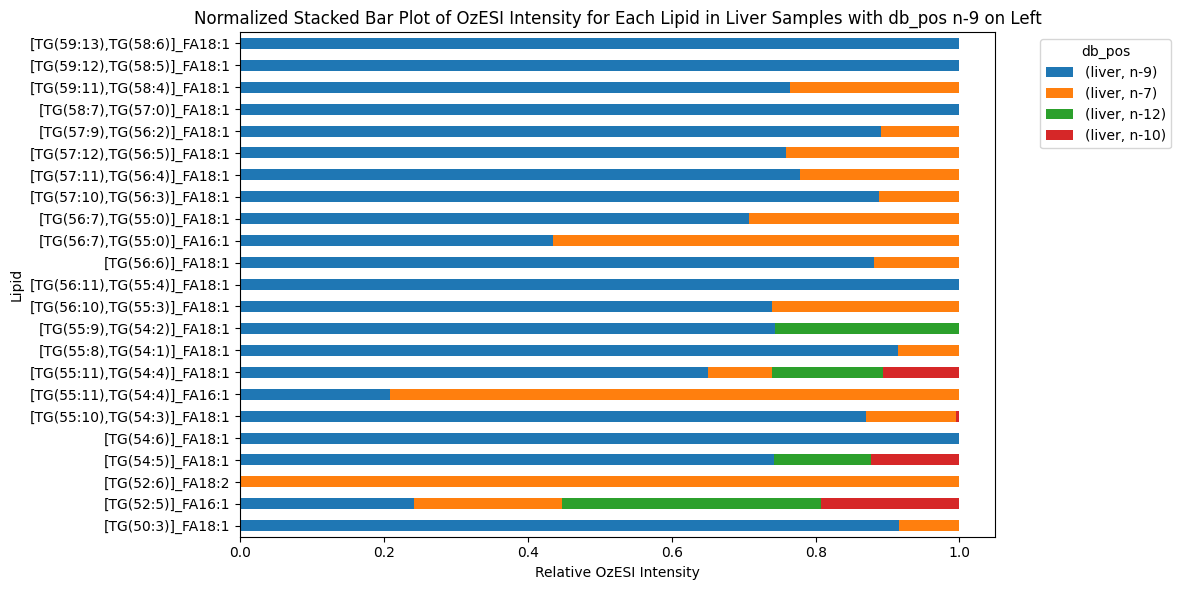

In [40]:
# Normalizing the OzESI Intensity within each lipid (making it relative)
pivot_liver_stacked_normalized_df = pivot_liver_stacked_df.div(pivot_liver_stacked_df.sum(axis=1), axis=0)

# Plotting the stacked bar plot with normalized intensities
pivot_liver_stacked_normalized_df.plot(kind='barh', stacked=True, figsize=(12, 6))
plt.xlabel('Relative OzESI Intensity')
plt.ylabel('Lipid')
plt.title('Normalized Stacked Bar Plot of OzESI Intensity for Each Lipid in Liver Samples by db_pos')
plt.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Sorting the columns so that 'n-9' comes first in the stacking order
sorted_columns = sorted(pivot_liver_stacked_normalized_df.columns, reverse=True)
pivot_liver_stacked_normalized_sorted_df = pivot_liver_stacked_normalized_df[sorted_columns]

# Plotting the stacked bar plot with normalized intensities and reordered stacking
pivot_liver_stacked_normalized_sorted_df.plot(kind='barh', stacked=True, figsize=(12, 6))
plt.xlabel('Relative OzESI Intensity')
plt.ylabel('Lipid')
plt.title('Normalized Stacked Bar Plot of OzESI Intensity for Each Lipid in Liver Samples with db_pos n-9 on Left')
plt.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


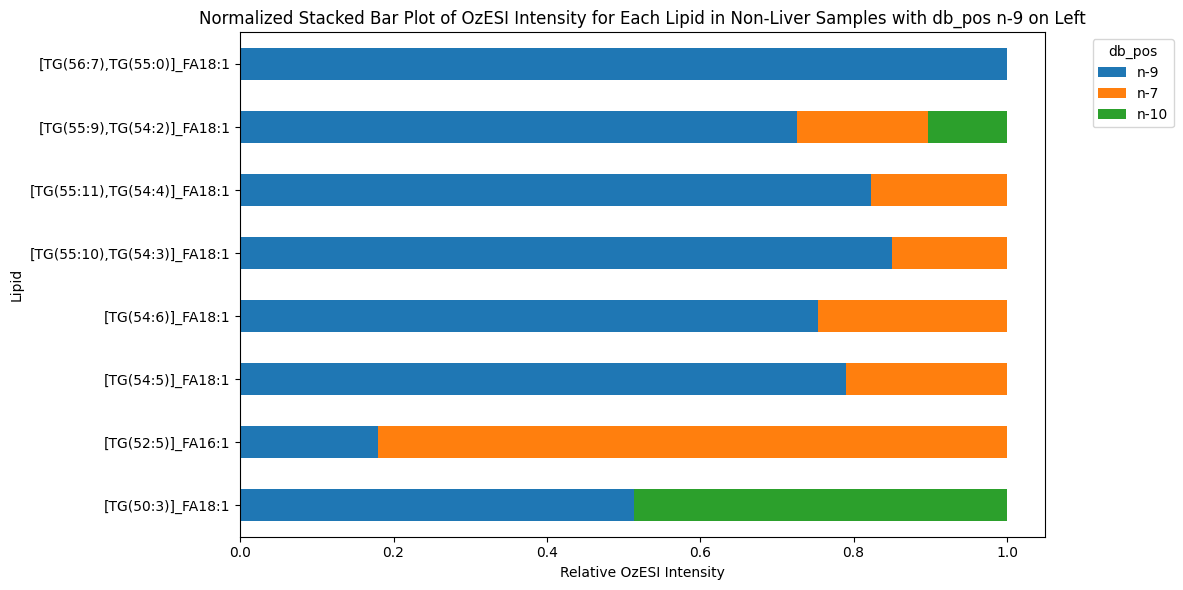

In [29]:
# Filtering the DataFrame for samples that do not contain 'liver' in their Sample_ID
non_liver_samples_df = df[~df['Sample_ID'].str.contains('liver')]

# Pivoting the data for the non-liver samples with stacking by 'db_pos'
pivot_non_liver_stacked_df = non_liver_samples_df.pivot_table(index='Lipid', columns='db_pos', values='OzESI_Intensity', fill_value=0)

# Normalizing the OzESI Intensity within each lipid for non-liver samples (making it relative)
pivot_non_liver_stacked_normalized_df = pivot_non_liver_stacked_df.div(pivot_non_liver_stacked_df.sum(axis=1), axis=0)

# Plotting the stacked bar plot with normalized intensities for non-liver samples
pivot_non_liver_stacked_normalized_df.plot(kind='barh', stacked=True, figsize=(12, 6))
plt.xlabel('Relative OzESI Intensity')
plt.ylabel('Lipid')
plt.title('Normalized Stacked Bar Plot of OzESI Intensity for Each Lipid in Non-Liver Samples by db_pos')
plt.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Sorting the columns for the non-liver samples so that 'n-9' comes first in the stacking order
sorted_columns_non_liver = sorted(pivot_non_liver_stacked_normalized_df.columns, reverse=True)
pivot_non_liver_stacked_normalized_sorted_df = pivot_non_liver_stacked_normalized_df[sorted_columns_non_liver]

# Plotting the stacked bar plot with normalized intensities and reordered stacking for non-liver samples
pivot_non_liver_stacked_normalized_sorted_df.plot(kind='barh', stacked=True, figsize=(12, 6))
plt.xlabel('Relative OzESI Intensity')
plt.ylabel('Lipid')
plt.title('Normalized Stacked Bar Plot of OzESI Intensity for Each Lipid in Non-Liver Samples with db_pos n-9 on Left')
plt.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



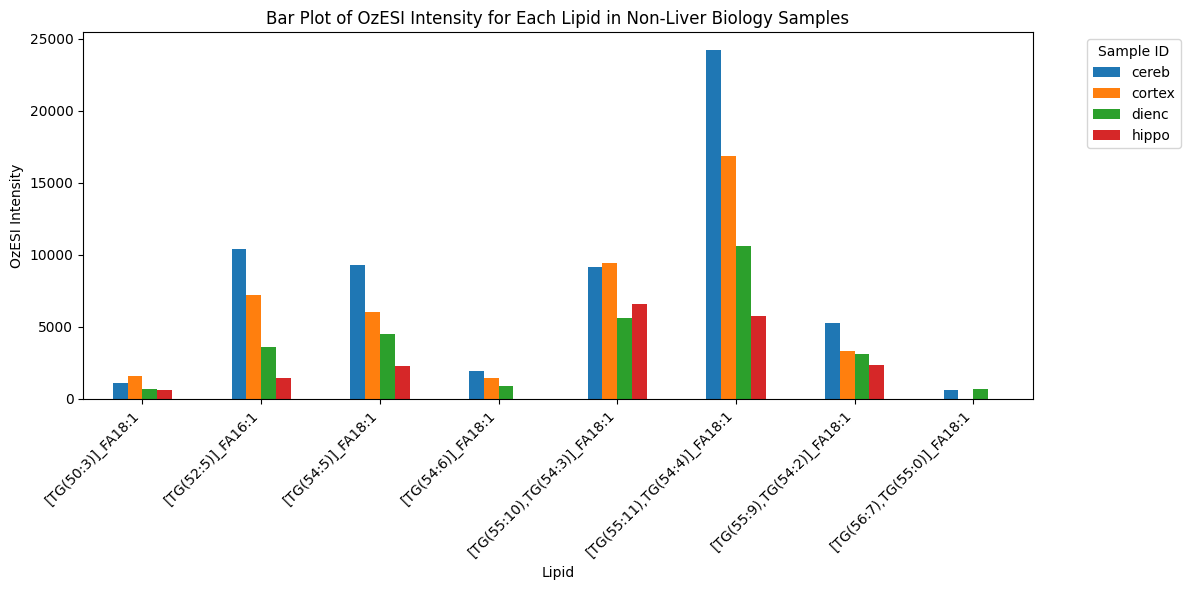

In [23]:
# Filtering the DataFrame to exclude 'Biology' as 'liver'
non_liver_df = df[~df['Sample_ID'].str.contains('liver')]

# Pivoting the data for non-liver biology categories
pivot_non_liver_df = non_liver_df.pivot_table(index='Lipid', columns='Biology', values='OzESI_Intensity', fill_value=0)

# Plotting
pivot_non_liver_df.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Lipid')
plt.ylabel('OzESI Intensity')
plt.title('Bar Plot of OzESI Intensity for Each Lipid in Non-Liver Biology Samples')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sample ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [15]:
grouped_df = df.groupby(['Lipid', 'Sample_ID','db_pos'])['OzESI_Intensity'].sum().reset_index()


# Calculating the total intensity for each db_pos of every Lipid and Sample_ID combination
grouped_df['Total_DB_Intensity'] = grouped_df.groupby(['Lipid', 'Sample_ID'])['OzESI_Intensity'].transform('sum')

grouped_df

# Calculating the 'n-9%' for each row where db_pos is 'n-9'
grouped_df['n-9%'] = None  # Initializing the column with None values
n9_rows = grouped_df['db_pos'] == 'n-9'  # Identifying rows where db_pos is 'n-9'


# Calculating n-9% for the identified rows
grouped_df.loc[n9_rows, 'n-9%'] = (grouped_df.loc[n9_rows, 'OzESI_Intensity'] / grouped_df.loc[n9_rows, 'Total_DB_Intensity']) * 100

# Display the first few rows of the updated dataframe
grouped_df.head(50)
grouped_df.to_csv('grouped_df.csv')

n9_df = grouped_df.copy()
n9_df = n9_df.dropna(subset=['n-9%'])

n9_df





# # Pivoting for plotting
# pivot_table = grouped_df.pivot(index='Lipid', columns='Sample_ID', values='n-9%')
# pivot_table

,Lipid,Sample_ID,db_pos,OzESI_Intensity,Total_DB_Intensity,n-9%
0,[TG(50:3)]_FA18:1,11282023_DOD94_F3_WT_dienc_O3on_01,n-9,508.580048,508.580048,100.0
1,[TG(50:3)]_FA18:1,11282023_FAD184_F3_WT_cereb_O3on_01,n-9,502.100037,502.100037,100.0
2,[TG(50:3)]_FA18:1,11282023_FAD184_F3_WT_hippo_O3on_01,n-9,573.440063,573.440063,100.0
4,[TG(50:3)]_FA18:1,11282023_FAD184_F4_WT_dienc_O3on_01,n-9,584.980042,584.980042,100.0
5,[TG(50:3)]_FA18:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-9,659.140076,659.140076,100.0
...,...,...,...,...,...,...
456,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,618.880066,618.880066,100.0
457,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,641.640076,641.640076,100.0
458,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,1293.440063,1293.440063,100.0
459,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,1196.560059,1196.560059,100.0


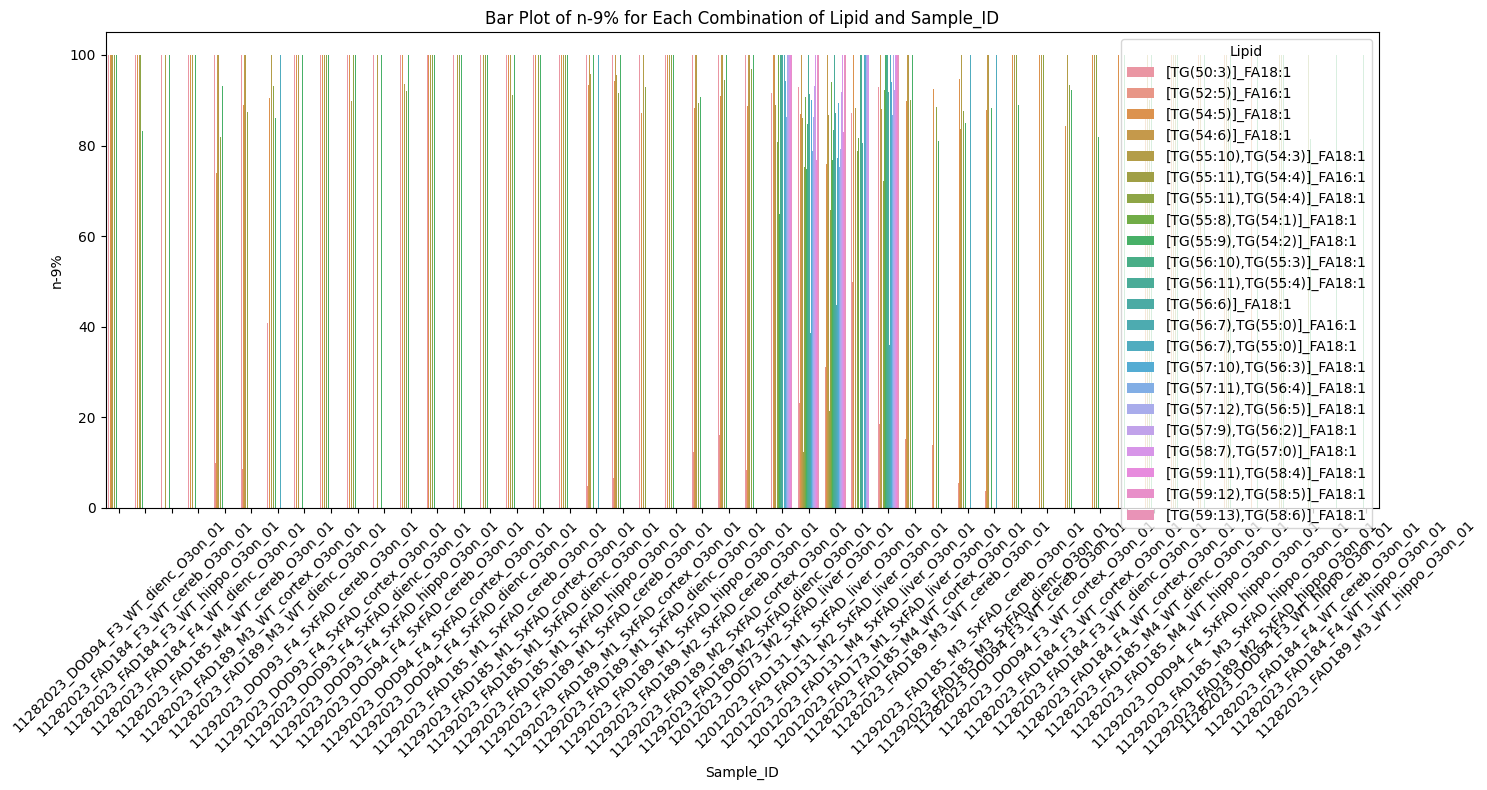

In [16]:

# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(data=n9_df, x='Sample_ID', y='n-9%', hue='Lipid')
plt.xticks(rotation=45)
plt.title('Bar Plot of n-9% for Each Combination of Lipid and Sample_ID')
plt.ylabel('n-9%')
plt.xlabel('Sample_ID')
plt.tight_layout()
plt.show()

Make liver df and brain df

In [165]:
# Filter for 'liver' in Biology
liver_df = df[df['Biology'] == 'liver']
# Filter the DataFrame for each of the brain biology values and concatenate them into one DataFrame
brain_df = pd.concat([
    df[df['Biology'] == 'cortex'],
    df[df['Biology'] == 'cereb'],
    df[df['Biology'] == 'hippo'],
    df[df['Biology'] == 'dienc']
])
brain_df

,Lipid,Sample_ID,db_pos,Retention_Time,OzESI_Intensity,Transition,Parent_Ion,Product_Ion,Cluster_Label,Biology
6,[TG(50:3)]_FA18:1,11282023_FAD189_M3_WT_cortex_O3on_01,n-9,13.582050,1114.060059,736.7 -> 547.5,736.7,547.5,0,cortex
10,[TG(50:3)]_FA18:1,11292023_DOD93_F4_5xFAD_cortex_O3on_01,n-9,13.804067,967.260071,736.7 -> 547.5,736.7,547.5,0,cortex
14,[TG(50:3)]_FA18:1,11292023_DOD94_F4_5xFAD_cortex_O3on_01,n-9,13.582017,1122.320068,736.7 -> 547.5,736.7,547.5,0,cortex
17,[TG(50:3)]_FA18:1,11292023_FAD185_M1_5xFAD_cortex_O3on_01,n-9,13.582050,851.400085,736.7 -> 547.5,736.7,547.5,0,cortex
21,[TG(50:3)]_FA18:1,11292023_FAD189_M1_5xFAD_cortex_O3on_01,n-9,13.626417,4646.960449,736.7 -> 547.5,736.7,547.5,0,cortex
...,...,...,...,...,...,...,...,...,...,...
352,"[TG(55:9),TG(54:2)]_FA18:1",11292023_FAD185_M3_5xFAD_dienc_O3on_01,n-9,16.898183,7040.260742,794.7 -> 605.5,794.7,605.5,0,dienc
356,"[TG(55:9),TG(54:2)]_FA18:1",11292023_FAD189_M1_5xFAD_dienc_O3on_01,n-9,17.164617,1402.160156,794.7 -> 605.5,794.7,605.5,0,dienc
361,"[TG(55:9),TG(54:2)]_FA18:1",11292023_FAD189_M2_5xFAD_dienc_O3on_01,n-9,16.853767,2831.120117,794.7 -> 605.5,794.7,605.5,0,dienc
399,"[TG(56:7),TG(55:0)]_FA18:1",11282023_FAD189_M3_WT_dienc_O3on_01,n-9,13.162683,656.980042,812.8 -> 623.6,812.8,623.6,0,dienc


In [174]:
# Group by Lipid and db_pos
liver_df['Lipid_DB_group'] = liver_df.groupby(['Lipid', 'Sample_ID']).ngroup()
brain_df['Lipid_DB_group'] = brain_df.groupby(['Lipid', 'Sample_ID']).ngroup()
df['Lipid_Sample_group'] = df.groupby(['Lipid', 'Sample_ID']).ngroup()
df.to_csv('df_OzESI_labels.csv')
liver_df
brain_df
df



/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Lipid,Sample_ID,db_pos,Retention_Time,OzESI_Intensity,Transition,Parent_Ion,Product_Ion,Cluster_Label,Biology,Lipid_Sample_group
0,[TG(50:3)]_FA18:1,11282023_DOD94_F3_WT_dienc_O3on_01,n-9,13.981717,508.580048,736.7 -> 547.5,736.7,547.5,0,dienc,0
1,[TG(50:3)]_FA18:1,11282023_FAD184_F3_WT_cereb_O3on_01,n-9,13.626433,502.100037,736.7 -> 547.5,736.7,547.5,0,cereb,1
2,[TG(50:3)]_FA18:1,11282023_FAD184_F3_WT_hippo_O3on_01,n-9,13.670867,573.440063,736.7 -> 547.5,736.7,547.5,0,hippo,2
3,[TG(50:3)]_FA18:1,11282023_FAD184_F4_WT_cereb_O3on_01,n-10,13.672033,1120.760132,722.7 -> 547.5,722.7,547.5,-1,cereb,3
4,[TG(50:3)]_FA18:1,11282023_FAD184_F4_WT_dienc_O3on_01,n-9,14.114917,584.980042,736.7 -> 547.5,736.7,547.5,0,dienc,4
...,...,...,...,...,...,...,...,...,...,...,...
456,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,16.041483,618.880066,844.7 -> 655.5,844.7,655.5,-1,liver,321
457,"[TG(59:12),TG(58:5)]_FA18:1",12012023_FAD173_M1_5xFAD_liver_O3on_01,n-9,16.041500,641.640076,844.7 -> 655.5,844.7,655.5,-1,liver,322
458,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M1_5xFAD_liver_O3on_01,n-9,15.509183,1293.440063,842.7 -> 653.5,842.7,653.5,-1,liver,323
459,"[TG(59:13),TG(58:6)]_FA18:1",12012023_FAD131_M2_5xFAD_liver_O3on_01,n-9,15.553600,1196.560059,842.7 -> 653.5,842.7,653.5,-1,liver,324


Make Pivot Table

In [180]:
grouped_df = df.groupby(['Lipid', 'Sample_ID','db_pos'])['OzESI_Intensity'].sum().reset_index()


# Calculating the total intensity for each db_pos of every Lipid and Sample_ID combination
grouped_df['Total_DB_Intensity'] = grouped_df.groupby(['Lipid', 'Sample_ID'])['OzESI_Intensity'].transform('sum')

# Calculating the 'n-9%' for each row where db_pos is 'n-9'
grouped_df['n-9%'] = None  # Initializing the column with None values
n9_rows = grouped_df['db_pos'] == 'n-9'  # Identifying rows where db_pos is 'n-9'

# Calculating n-9% for the identified rows
grouped_df.loc[n9_rows, 'n-9%'] = (grouped_df.loc[n9_rows, 'OzESI_Intensity'] / grouped_df.loc[n9_rows, 'Total_DB_Intensity']) * 100

# Display the first few rows of the updated dataframe
grouped_df.head(50)

n9_df = grouped_df.copy()
n9_df = n9_df.dropna(subset=['n-9%'])

n9_df.head(50)



# # Calculating the relative percentage of OzESI_Intensity for each Sample_ID within each Lipid
# grouped_df['Relative_Percentage'] = (grouped_df['OzESI_Intensity'] / grouped_df['Total_Intensity']) * 100

# # Pivoting for plotting
# pivot_table = grouped_df.pivot(index='Lipid', columns='Sample_ID', values='Relative_Percentage')
# pivot_table

,Lipid,Sample_ID,db_pos,OzESI_Intensity,Total_DB_Intensity,n-9%
0,[TG(50:3)]_FA18:1,11282023_DOD94_F3_WT_dienc_O3on_01,n-9,508.580048,508.580048,100.000000
1,[TG(50:3)]_FA18:1,11282023_FAD184_F3_WT_cereb_O3on_01,n-9,502.100037,502.100037,100.000000
2,[TG(50:3)]_FA18:1,11282023_FAD184_F3_WT_hippo_O3on_01,n-9,573.440063,573.440063,100.000000
4,[TG(50:3)]_FA18:1,11282023_FAD184_F4_WT_dienc_O3on_01,n-9,584.980042,584.980042,100.000000
5,[TG(50:3)]_FA18:1,11282023_FAD185_M4_WT_cereb_O3on_01,n-9,659.140076,659.140076,100.000000
6,[TG(50:3)]_FA18:1,11282023_FAD189_M3_WT_cortex_O3on_01,n-9,1114.060059,1114.060059,100.000000
8,[TG(50:3)]_FA18:1,11282023_FAD189_M3_WT_dienc_O3on_01,n-9,542.420044,1329.980103,40.784072
9,[TG(50:3)]_FA18:1,11292023_DOD93_F4_5xFAD_cereb_O3on_01,n-9,548.920044,548.920044,100.000000
10,[TG(50:3)]_FA18:1,11292023_DOD93_F4_5xFAD_cortex_O3on_01,n-9,967.260071,967.260071,100.000000
11,[TG(50:3)]_FA18:1,11292023_DOD93_F4_5xFAD_dienc_O3on_01,n-9,692.440063,692.440063,100.000000


Brain plot summed intensity % for each TG in brain

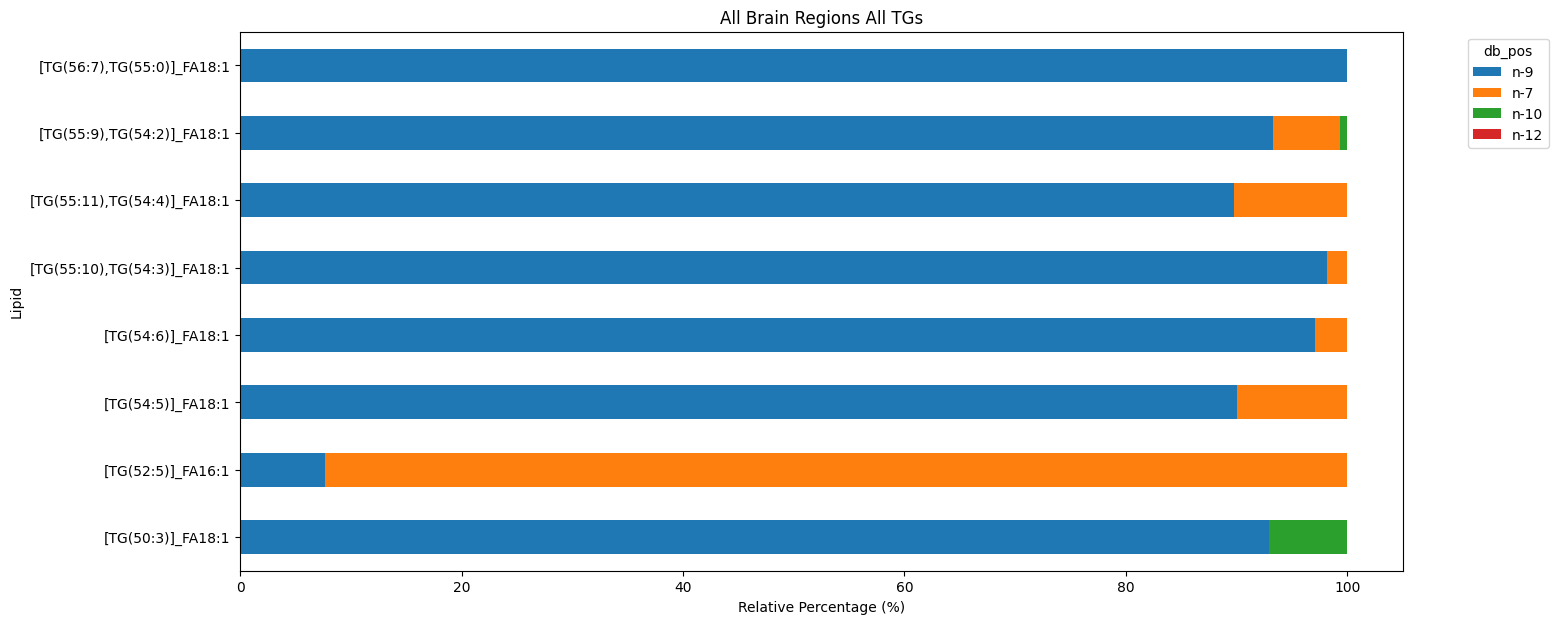

In [71]:
# Group by Lipid and db_pos, summing OzESI_Intensity
grouped_brain = brain_df.groupby(['Lipid', 'db_pos'])['OzESI_Intensity'].sum().reset_index()

# Calculating the total intensity for each Lipid
grouped_brain['Total_Intensity'] = grouped_brain.groupby('Lipid')['OzESI_Intensity'].transform('sum')

# Calculating the relative percentage of each db_pos
grouped_brain['Relative_Percentage'] = (grouped_brain['OzESI_Intensity'] / grouped_brain['Total_Intensity']) * 100

# Pivoting for plotting, ensuring the db_pos order is maintained
pivot_table_brain = grouped_brain.pivot(index='Lipid', columns='db_pos', values='Relative_Percentage')
pivot_table_brain = pivot_table_brain.reindex(['n-9', 'n-7', 'n-10', 'n-12'], axis=1, fill_value=0)

# Creating a horizontal bar plot
pivot_table_brain.plot(kind='barh', stacked=True, figsize=(15, 7))
plt.xlabel('Relative Percentage (%)')
plt.title('All Brain Regions All TGs')
plt.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')

# Saving the plot as a PNG file
file_name = f"Brain_AllRegions_TGs.png"
plt.savefig(file_name, bbox_inches='tight')
plt.show()


summed relative intensity for each TG in liver

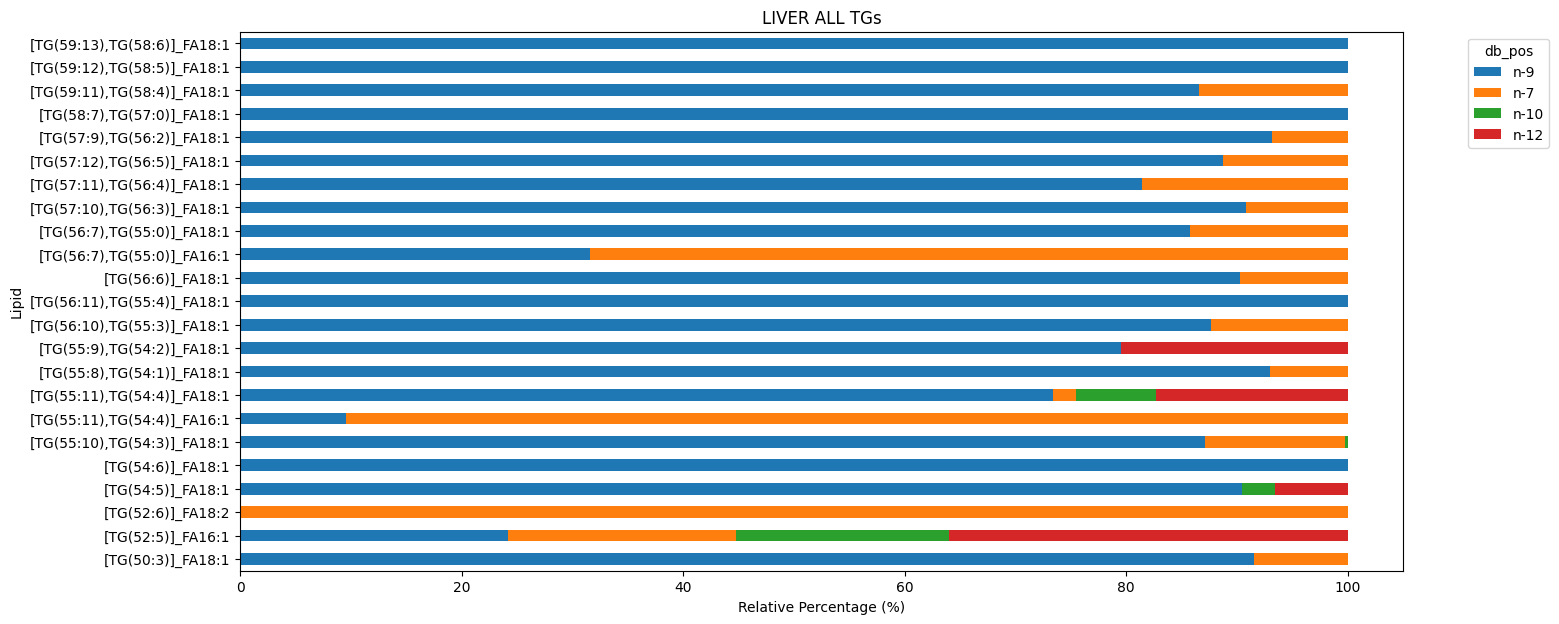

In [72]:
# Adjusting the code to ensure all 'db_pos' categories are present after pivoting

# First, we sum the OzESI_Intensity for each db_pos within each Sample_ID
grouped = liver_df.groupby(['Lipid', 'db_pos'])['OzESI_Intensity'].sum().reset_index()

# Calculating the total intensity for each Sample_ID
grouped['Total_Intensity'] = grouped.groupby('Lipid')['OzESI_Intensity'].transform('sum')

# Calculating the relative percentage of each db_pos
grouped['Relative_Percentage'] = (grouped['OzESI_Intensity'] / grouped['Total_Intensity']) * 100

# Pivoting for plotting
pivot_table = grouped.pivot(index='Lipid', columns='db_pos', values='Relative_Percentage')

# Ensuring that all db_pos categories are present
all_db_pos = ['n-9', 'n-7', 'n-10', 'n-12']
pivot_table = pivot_table.reindex(all_db_pos, axis=1, fill_value=0)

# Ordering the db_pos categories as desired
pivot_table = pivot_table[all_db_pos]

# Plotting all together with the desired order of db_pos
pivot_table.plot(kind='barh', stacked=True, figsize=(15, 7))
plt.ylabel('Lipid')
plt.xlabel('Relative Percentage (%)')
plt.title('LIVER ALL TGs')
plt.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')
# Saving the plot as a PNG file
file_name = f"Liver_TGs.png"
plt.savefig(file_name, bbox_inches='tight')
plt.show()


Brain regions seperately

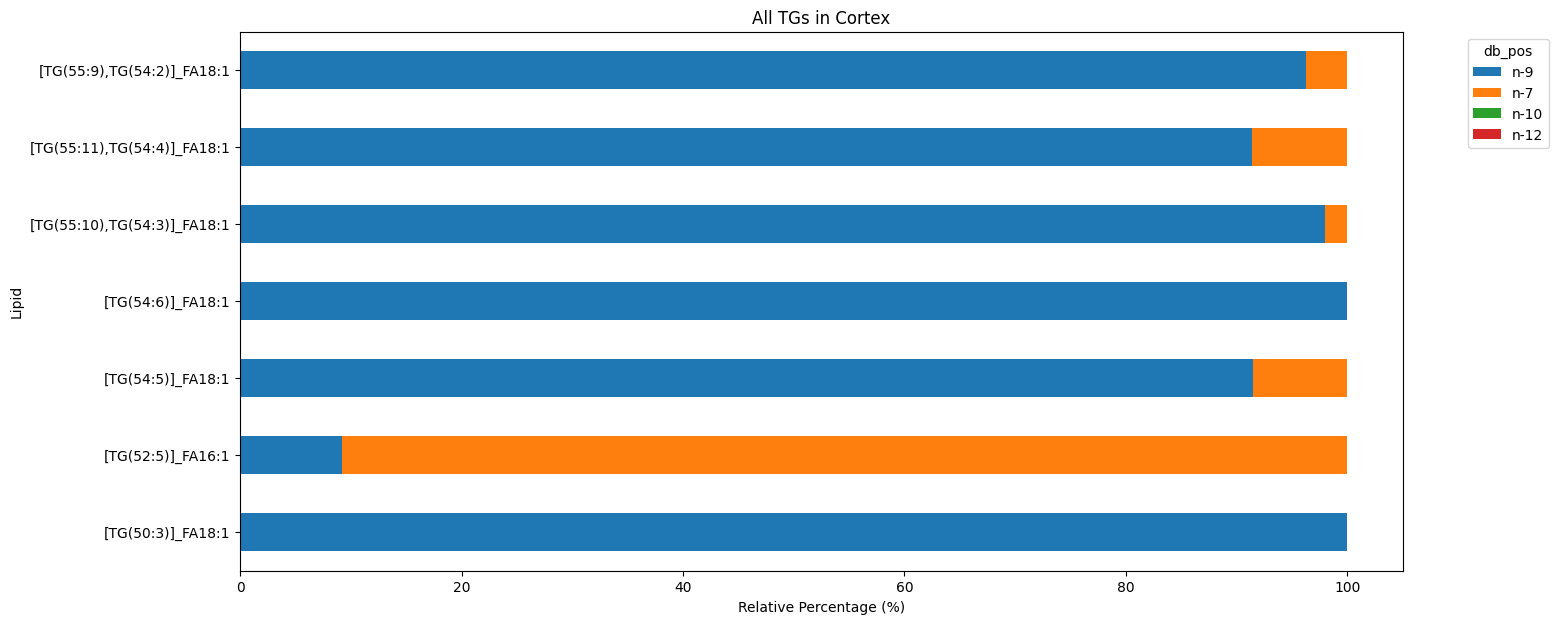

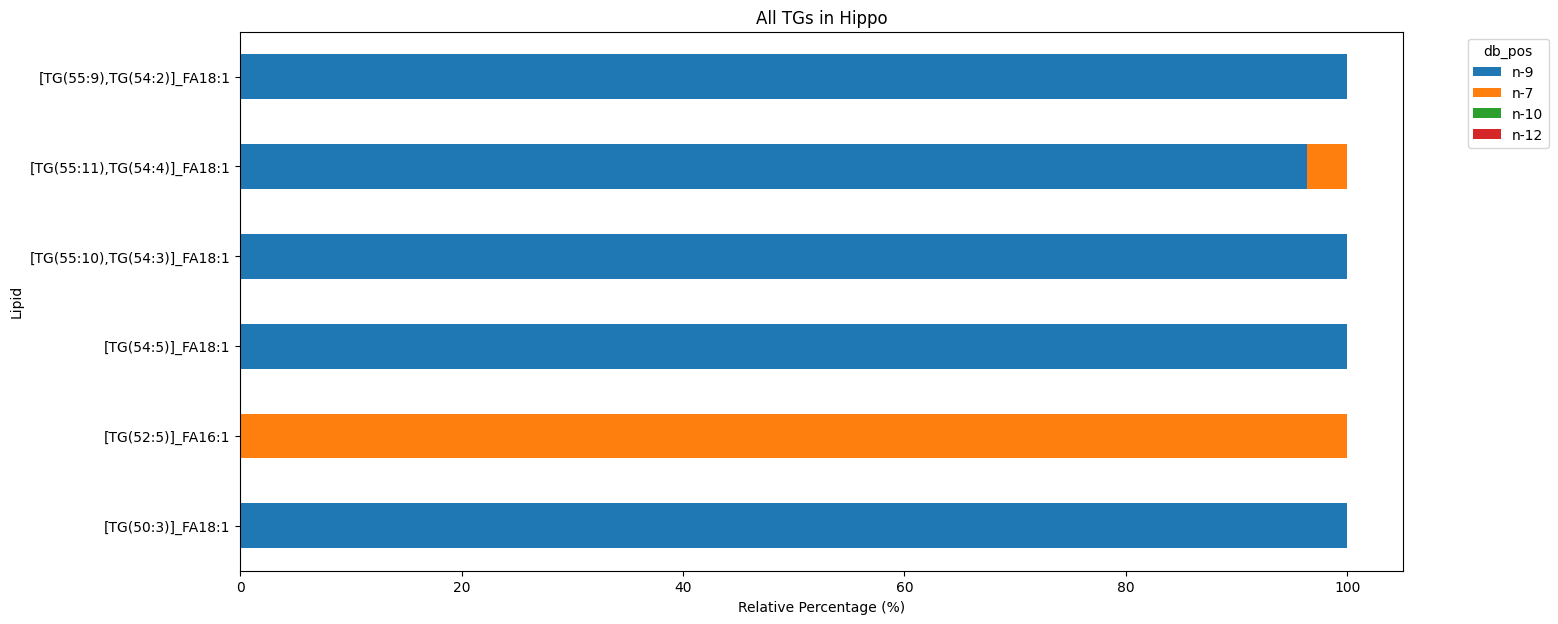

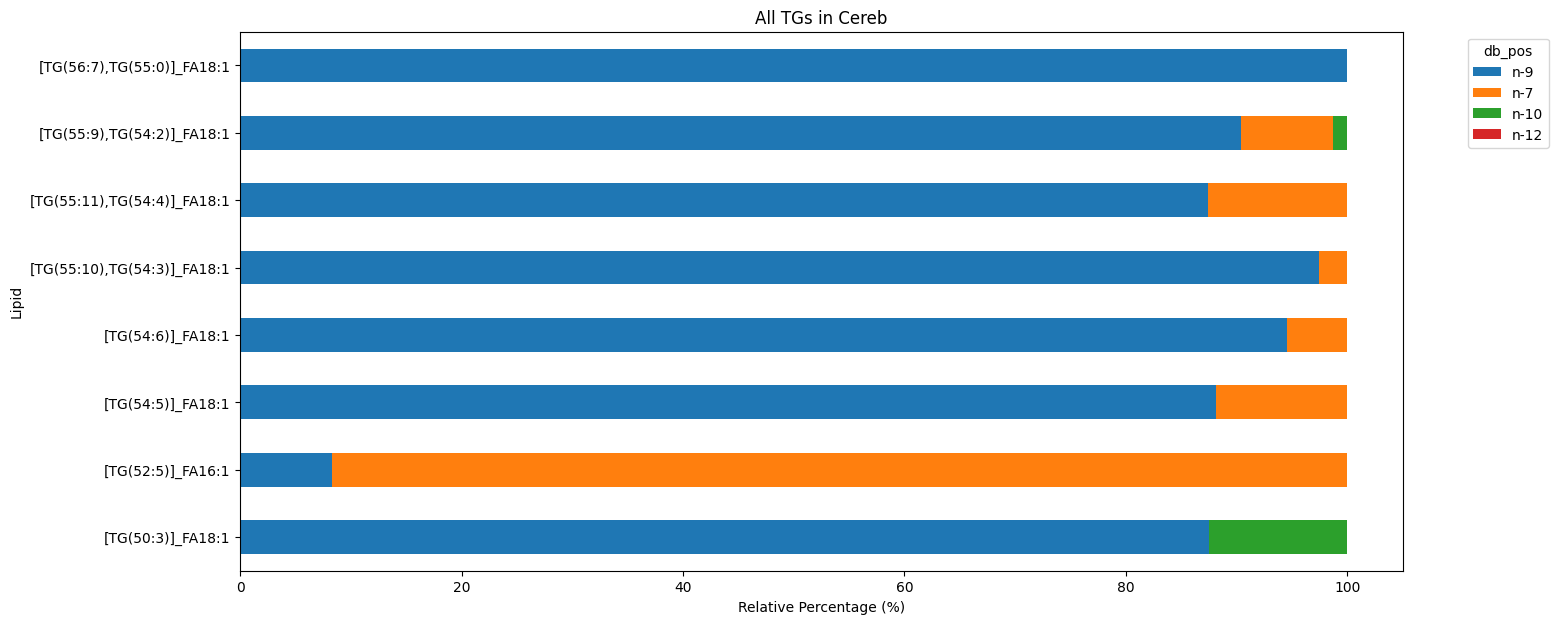

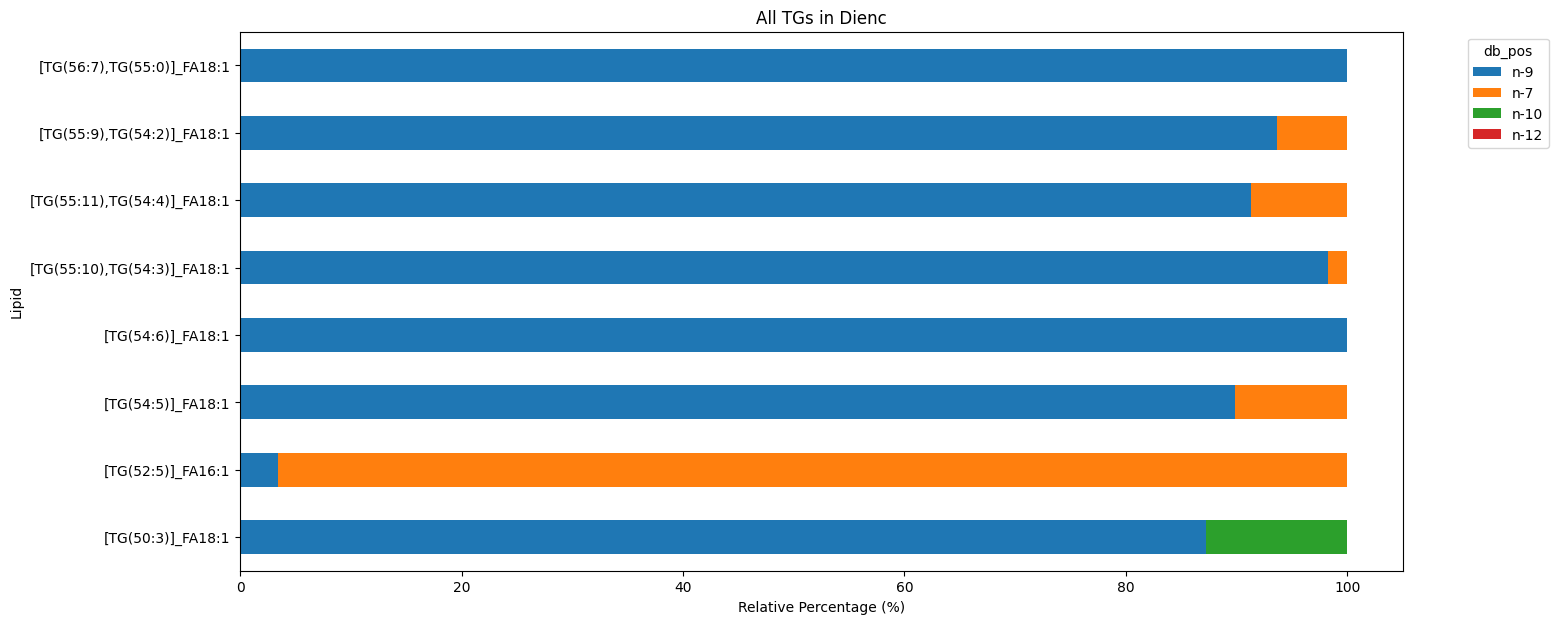

In [78]:
# Assuming 'brain_df' is already defined and contains the necessary data
# Creating separate horizontal bar plots for each brain region: cortex, hippo, cereb, dienc

for region in ['cortex', 'hippo', 'cereb', 'dienc']:
    # Filter data for the current region
    region_df = brain_df[brain_df['Biology'] == region]

    # Group by Lipid and db_pos, summing OzESI_Intensity
    grouped_region = region_df.groupby(['Lipid', 'db_pos'])['OzESI_Intensity'].sum().reset_index()

    # Calculating the total intensity for each Lipid
    grouped_region['Total_Intensity'] = grouped_region.groupby('Lipid')['OzESI_Intensity'].transform('sum')

    # Calculating the relative percentage of each db_pos
    grouped_region['Relative_Percentage'] = (grouped_region['OzESI_Intensity'] / grouped_region['Total_Intensity']) * 100

    # Pivoting for plotting
    pivot_table_region = grouped_region.pivot(index='Lipid', columns='db_pos', values='Relative_Percentage')
    pivot_table_region = pivot_table_region.reindex(['n-9', 'n-7', 'n-10', 'n-12'], axis=1, fill_value=0)

    # Creating a horizontal bar plot for the current brain region
    pivot_table_region.plot(kind='barh', stacked=True, figsize=(15, 7))
    plt.xlabel('Relative Percentage (%)')
    plt.title(f'All TGs in {region.capitalize()}')
    plt.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')
    # Saving the plot as a PNG file
    file_name = f"{region.capitalize()}.png"
    plt.savefig(file_name, bbox_inches='tight')
    plt.show()


ABOVE LOOKS GOOD

HEATMAP HEATMAP

In [144]:
# Extracting the brain region from the 'Sample_ID' column
brain_df['Brain_Region'] = brain_df['Sample_ID'].str.extract(r'(\w+)_O3on')

# Grouping by Lipid, Brain Region, and db_pos, and summing OzESI_Intensity
grouped_brain = brain_df.groupby(['Lipid', 'Brain_Region', 'db_pos'])['OzESI_Intensity'].sum().reset_index()

# Calculating the total intensity for each Lipid-Brain Region combination
grouped_brain['Total_Intensity'] = grouped_brain.groupby(['Lipid', 'Brain_Region'])['OzESI_Intensity'].transform('sum')

# Calculating the relative percentage of each db_pos within each Lipid-Brain Region combination
grouped_brain['Relative_Percentage'] = (grouped_brain['OzESI_Intensity'] / grouped_brain['Total_Intensity']) * 100

# Pivoting for plotting
pivot_table_brain = grouped_brain.pivot_table(
    index='Lipid', 
    columns=['Brain_Region', 'db_pos'], 
    values='Relative_Percentage'
)

# Reset index to flatten the multi-level columns
pivot_table_brain.columns = ['_'.join(col).strip() for col in pivot_table_brain.columns.values]
pivot_table_brain.reset_index(inplace=True)


# Removing the initial numbering (date-like numbers) from each column name
pivot_table_brain.columns = ['_'.join(col.split('_')[1:]) for col in pivot_table_brain.columns]

# Display the first few rows of the pivot table after removing the numbering
pivot_table_brain.head()


/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,,DOD94_F3_WT_cereb_n-7,DOD94_F3_WT_cereb_n-9,DOD94_F3_WT_cortex_n-7,DOD94_F3_WT_cortex_n-9,DOD94_F3_WT_dienc_n-7,DOD94_F3_WT_dienc_n-9,DOD94_F3_WT_hippo_n-9,FAD184_F3_WT_cereb_n-7,FAD184_F3_WT_cereb_n-9,...,FAD189_M1_5xFAD_dienc_n-9,FAD189_M1_5xFAD_hippo_n-7,FAD189_M1_5xFAD_hippo_n-9,FAD189_M2_5xFAD_cereb_n-7,FAD189_M2_5xFAD_cereb_n-9,FAD189_M2_5xFAD_cortex_n-7,FAD189_M2_5xFAD_cortex_n-9,FAD189_M2_5xFAD_dienc_n-7,FAD189_M2_5xFAD_dienc_n-9,FAD189_M2_5xFAD_hippo_n-9
0,[TG(50:3)]_FA18:1,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,100.0,...,100.000000,NaN,100.0,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN
1,[TG(52:5)]_FA16:1,100.0,NaN,100.0,NaN,100.0,NaN,NaN,NaN,NaN,...,NaN,100.0,NaN,87.722276,12.277724,83.947685,16.052315,91.696800,8.303200,NaN
2,[TG(54:5)]_FA18:1,NaN,100.0,NaN,100.0,NaN,100.0,NaN,NaN,100.0,...,87.082549,NaN,100.0,11.601481,88.398519,9.074981,90.925019,11.355172,88.644828,100.0
3,[TG(54:6)]_FA18:1,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN
4,"[TG(55:10),TG(54:3)]_FA18:1",NaN,100.0,NaN,100.0,NaN,100.0,100.0,NaN,100.0,...,100.000000,NaN,100.0,NaN,100.000000,NaN,100.000000,NaN,100.000000,NaN


In [153]:
# First, we will replicate the process as done previously for the brain data
# Extracting the brain region from the 'Sample_ID' column
brain_df['Brain_Region'] = brain_df['Sample_ID'].str.extract(r'(\w+)_O3on')

# Preparing the pivot table for liver and brain data
pivot_table_liver_brain = pivot_table_brain.copy()

# Looping through the specified brain regions to create and append pivot tables
for region in ['cortex', 'hippo', 'cereb', 'dienc']:
    # Filter data for the current region
    region_df = brain_df[brain_df['Biology'] == region]

    # Group by Lipid and db_pos, summing OzESI_Intensity
    grouped_region = region_df.groupby(['Lipid', 'db_pos'])['OzESI_Intensity'].sum().reset_index()

    # Calculating the total intensity for each Lipid
    grouped_region['Total_Intensity'] = grouped_region.groupby('Lipid')['OzESI_Intensity'].transform('sum')

    # Calculating the relative percentage of each db_pos
    grouped_region['Relative_Percentage'] = (grouped_region['OzESI_Intensity'] / grouped_region['Total_Intensity']) * 100

    # Pivoting for plotting
    pivot_table_region = grouped_region.pivot(index='Lipid', columns='db_pos', values='Relative_Percentage')
    pivot_table_region = pivot_table_region.reindex(['n-9', 'n-7', 'n-10', 'n-12'], axis=1, fill_value=0)

    # Renaming the columns to include Sample_ID and db_pos
    pivot_table_region.columns = [region + '_' + col for col in pivot_table_region.columns]

    # Append pivot_table_region to pivot_table_liver_brain
    pivot_table_liver_brain = pd.concat([pivot_table_liver_brain, pivot_table_region], axis=1)

# Resetting index for the pivot table
pivot_table_liver_brain.reset_index(inplace=True, drop=True)

# Display the first few rows of the updated pivot table
pivot_table_liver_brain.head()

# # Filtering the pivot table to only keep columns with 'n-9' values
# pivot_table_liver_brain_n9 = pivot_table_liver_brain.filter(like='n-9')

# # Display the first few rows of the updated pivot table with only 'n-9' columns
# pivot_table_liver_brain_n9.head()



/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,,DOD94_F3_WT_cereb_n-7,DOD94_F3_WT_cereb_n-9,DOD94_F3_WT_cortex_n-7,DOD94_F3_WT_cortex_n-9,DOD94_F3_WT_dienc_n-7,DOD94_F3_WT_dienc_n-9,DOD94_F3_WT_hippo_n-9,FAD184_F3_WT_cereb_n-7,FAD184_F3_WT_cereb_n-9,...,hippo_n-10,hippo_n-12,cereb_n-9,cereb_n-7,cereb_n-10,cereb_n-12,dienc_n-9,dienc_n-7,dienc_n-10,dienc_n-12
0,[TG(50:3)]_FA18:1,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[TG(52:5)]_FA16:1,100.0,NaN,100.0,NaN,100.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[TG(54:5)]_FA18:1,NaN,100.0,NaN,100.0,NaN,100.0,NaN,NaN,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[TG(54:6)]_FA18:1,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[TG(55:10),TG(54:3)]_FA18:1",NaN,100.0,NaN,100.0,NaN,100.0,100.0,NaN,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


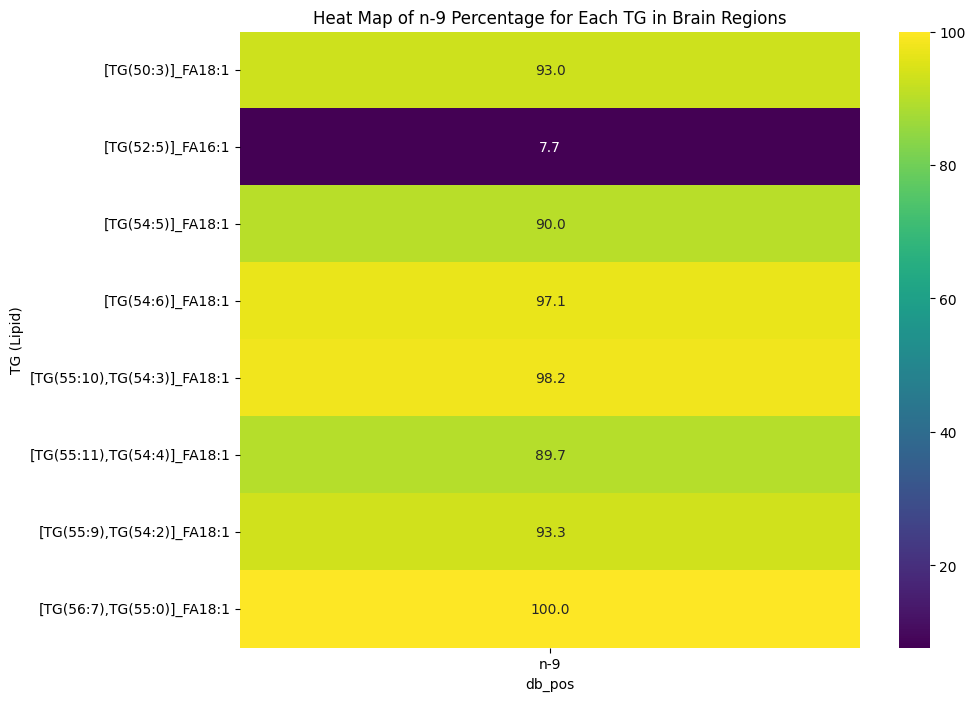

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'grouped_brain' is already defined and contains the necessary data
# Filtering data for 'n-9' db_pos
n9_data = grouped_brain[grouped_brain['db_pos'] == 'n-9']

# Pivoting for the heat map
pivot_n9 = n9_data.pivot(index='Lipid', columns='db_pos', values='Relative_Percentage')

# Creating the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_n9, annot=True, cmap='viridis', fmt='.1f')
plt.title('Heat Map of n-9 Percentage for Each TG in Brain Regions')
plt.ylabel('TG (Lipid)')
plt.xlabel('db_pos')
plt.show()


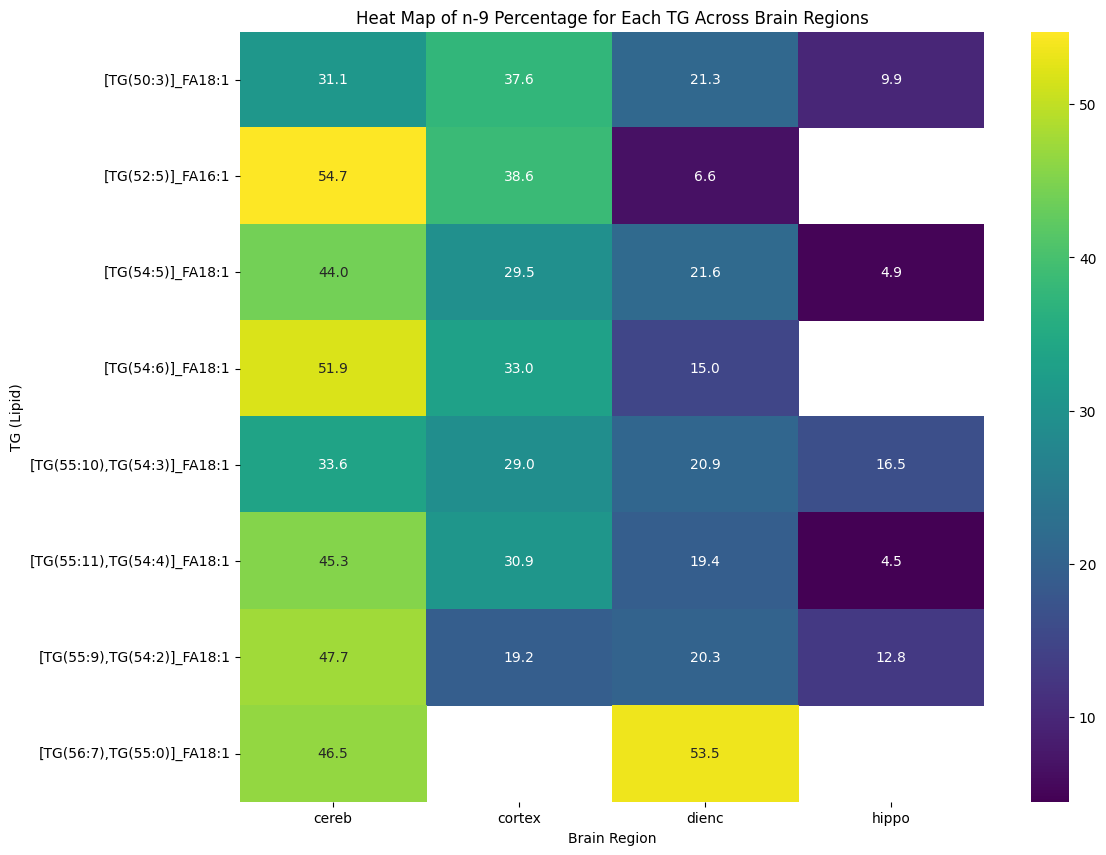

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'brain_df' is already defined and contains the necessary data
# Filtering data for 'n-9' db_pos across all brain regions
n9_data_all_regions = brain_df[brain_df['db_pos'] == 'n-9']

# Group by Lipid and Biology (brain region), summing OzESI_Intensity
grouped_n9_all_regions = n9_data_all_regions.groupby(['Lipid', 'Biology'])['OzESI_Intensity'].sum().reset_index()

# Calculating the total intensity for each Lipid in each brain region
grouped_n9_all_regions['Total_Intensity'] = grouped_n9_all_regions.groupby('Lipid')['OzESI_Intensity'].transform('sum')

# Calculating the relative percentage of 'n-9' for each lipid across brain regions
grouped_n9_all_regions['Relative_Percentage'] = (grouped_n9_all_regions['OzESI_Intensity'] / grouped_n9_all_regions['Total_Intensity']) * 100

# Pivoting for the heat map
pivot_n9_all_regions = grouped_n9_all_regions.pivot(index='Lipid', columns='Biology', values='Relative_Percentage')

# Creating the heat map for all brain regions
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_n9_all_regions, annot=True, cmap='viridis', fmt='.1f')
plt.title('Heat Map of n-9 Percentage for Each TG Across Brain Regions')
plt.ylabel('TG (Lipid)')
plt.xlabel('Brain Region')
plt.show()


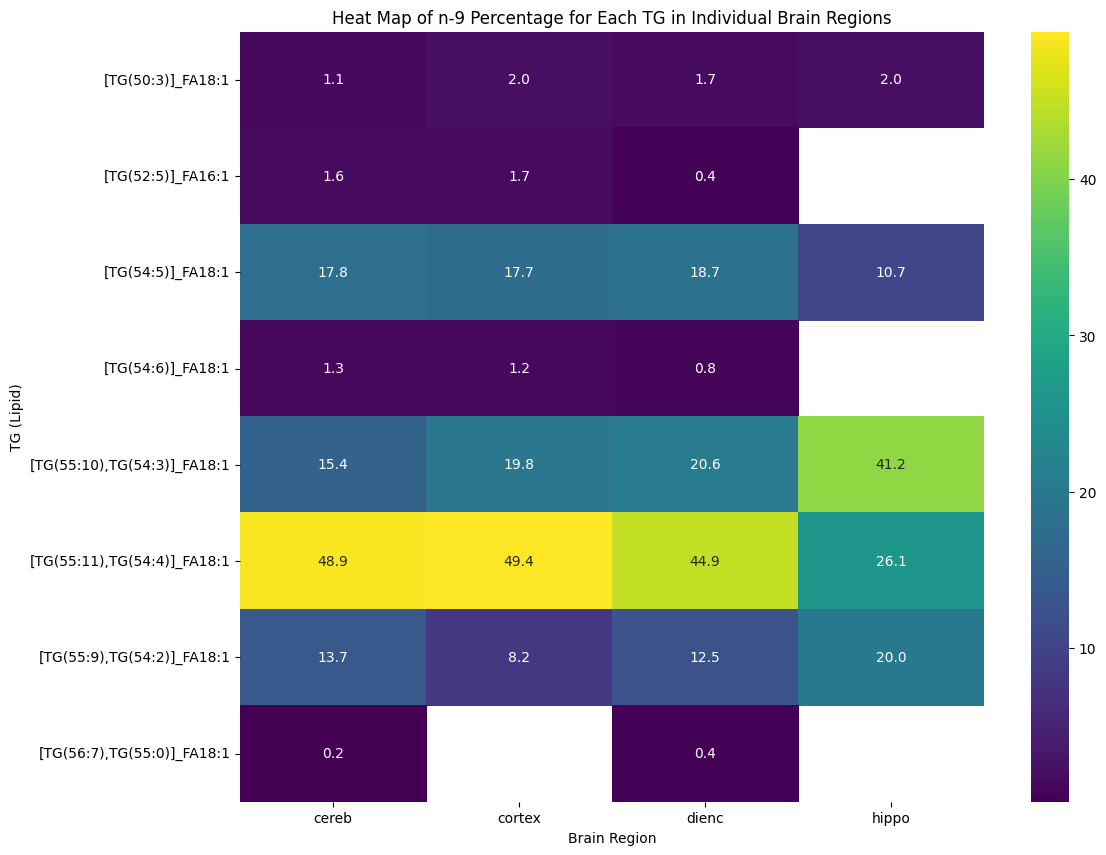

In [89]:
# Creating heatmaps for the relative percentage of 'n-9' for each lipid in individual brain regions
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'brain_df' is already defined and contains the necessary data
brain_regions = ['cortex', 'hippo', 'cereb', 'dienc']
combined_heatmap_data = pd.DataFrame()

for region in brain_regions:
    # Filter data for the current region and 'n-9' db_pos
    region_n9_data = brain_df[(brain_df['Biology'] == region) & (brain_df['db_pos'] == 'n-9')]

    # Group by Lipid, summing OzESI_Intensity
    grouped_region_n9 = region_n9_data.groupby('Lipid')['OzESI_Intensity'].sum().reset_index()

    # Calculating the total intensity for each Lipid in the region
    grouped_region_n9['Total_Intensity'] = region_n9_data['OzESI_Intensity'].sum()  # Total intensity of n-9 in the region

    # Calculating the relative percentage of 'n-9' for each lipid in the region
    grouped_region_n9['Relative_Percentage'] = (grouped_region_n9['OzESI_Intensity'] / grouped_region_n9['Total_Intensity']) * 100

    # Adding region information and appending to combined data
    grouped_region_n9['Region'] = region
    combined_heatmap_data = combined_heatmap_data.append(grouped_region_n9)

# Pivoting combined data for the heatmap
pivot_combined_heatmap = combined_heatmap_data.pivot(index='Lipid', columns='Region', values='Relative_Percentage')

# Creating the combined heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_combined_heatmap, annot=True, cmap='viridis', fmt='.1f')
plt.title('Heat Map of n-9 Percentage for Each TG in Individual Brain Regions')
plt.ylabel('TG (Lipid)')
plt.xlabel('Brain Region')
plt.show()


In [91]:
brain_df.to_csv('brain_df.csv')

In [ ]:
# Group by Sample_ID and db_pos, summing OzESI_Intensity
grouped_brain = brain_df.groupby(['Lipid', 'db_pos'])['OzESI_Intensity'].sum().reset_index()

# Calculating the total intensity for each Sample_ID
grouped_brain['Total_Intensity'] = grouped_brain.groupby('Lipid')['OzESI_Intensity'].transform('sum')

# Calculating the relative percentage of each db_pos
grouped_brain['Relative_Percentage'] = (grouped_brain['OzESI_Intensity'] / grouped_brain['Total_Intensity']) * 100

# Pivoting for plotting, ensuring the db_pos order is maintained
pivot_table_brain = grouped_brain.pivot(index='Lipid', columns='db_pos', values='Relative_Percentage')
pivot_table_brain = pivot_table_brain.reindex(['n-9', 'n-7', 'n-10', 'n-12'], axis=1, fill_value=0)

# Plotting all brain samples together
pivot_table_brain.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.ylabel('Relative Percentage (%)')
plt.title('Relative Percentage of OzESI Intensity by db_pos for Brain Samples')
plt.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [44]:
# # Creating a unique identifier combining 'Lipid' and 'Lipid_DB_group'
# liver_df['Lipid_Group_ID'] = liver_df['Lipid'] + '_Group_' + liver_df['Lipid_DB_group'].astype(str)


# # Group by this new identifier and db_pos, summing OzESI_Intensity
# grouped_intensity = liver_df.groupby(['Lipid_Group_ID', 'db_pos'])['OzESI_Intensity'].sum().reset_index()

# # Pivot the DataFrame for plotting
# pivot_intensity = grouped_intensity.pivot(index='Lipid_Group_ID', columns='db_pos', values='OzESI_Intensity').fillna(0)

# # Plotting
# pivot_intensity.plot(kind='bar', stacked=True)
# plt.ylabel('Sum of OzESI_Intensity')
# plt.title('Sum of OzESI_Intensity for Each Lipid and Lipid_DB_group')
# plt.show()

In [46]:
# # First, we sum the OzESI_Intensity for each db_pos within each Sample_ID
# grouped = liver_df.groupby(['Sample_ID', 'db_pos'])['OzESI_Intensity'].sum().reset_index()
# grouped = grouped.sort_values(by=['Sample_ID', 'db_pos', 'OzESI_Intensity'], ascending=[True, True, True])
# grouped
# # Next, we calculate the total intensity for each Sample_ID
# grouped['Total_Intensity'] = grouped.groupby('Sample_ID')['OzESI_Intensity'].transform('sum')

# # Now we calculate the relative percentage of each db_pos
# grouped['Relative_Percentage'] = (grouped['OzESI_Intensity'] / grouped['Total_Intensity']) * 100

# # Pivot for plotting
# pivot_table = grouped.pivot(index='Sample_ID', columns='db_pos', values='Relative_Percentage')
# pivot_table

# # Plotting all together
# pivot_table.plot(kind='bar', stacked=True, figsize=(15, 7))
# plt.ylabel('Relative Percentage (%)')
# plt.title('Relative Percentage of OzESI Intensity by db_pos for each Sample_ID')
# plt.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()


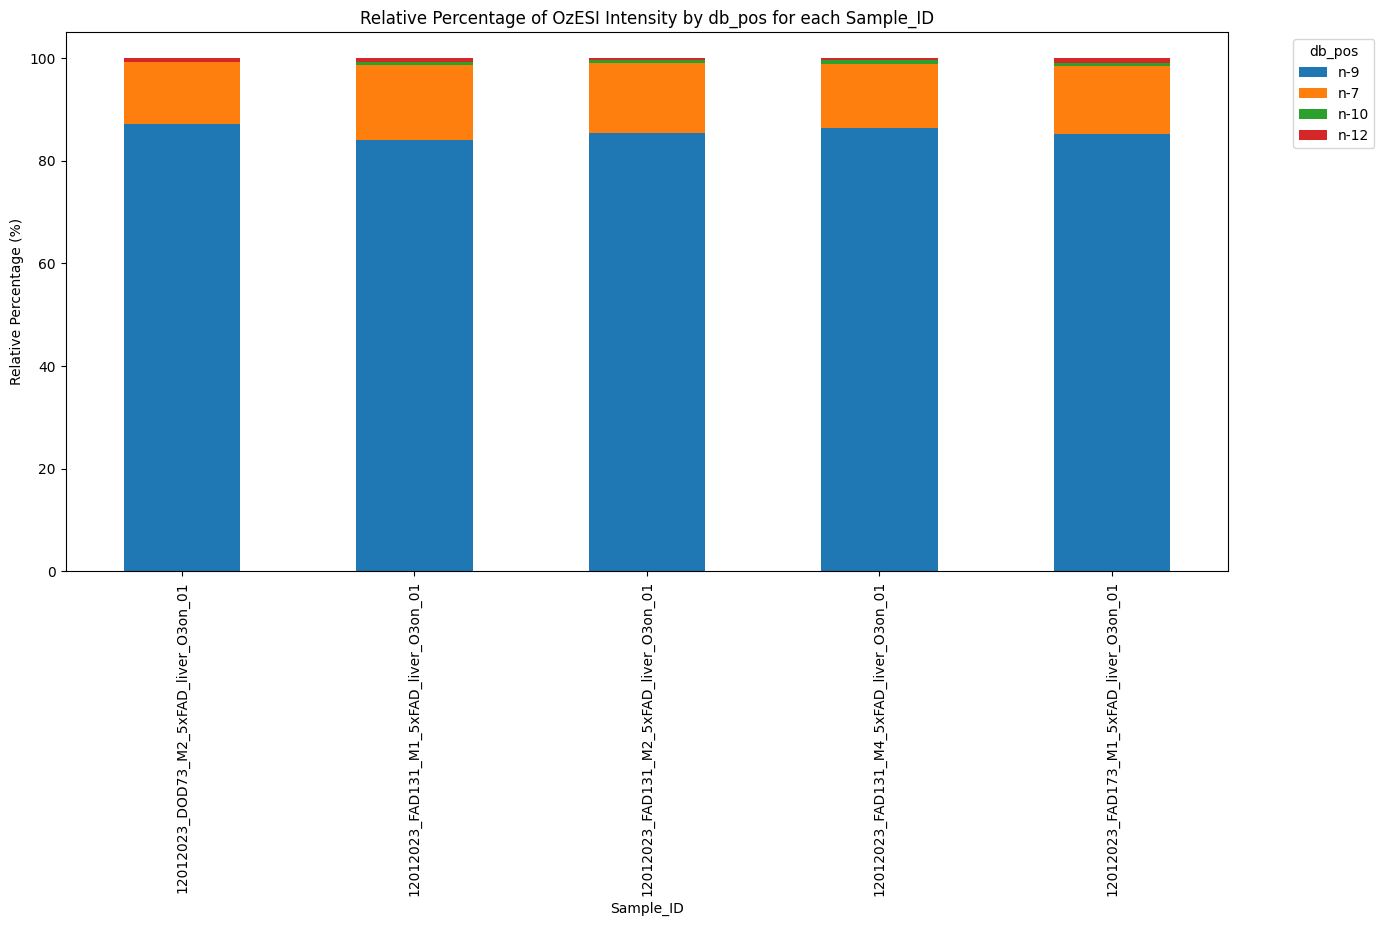

In [47]:
# Adjusting the code to ensure all 'db_pos' categories are present after pivoting

# First, we sum the OzESI_Intensity for each db_pos within each Sample_ID
grouped = liver_df.groupby(['Sample_ID', 'db_pos'])['OzESI_Intensity'].sum().reset_index()

# Calculating the total intensity for each Sample_ID
grouped['Total_Intensity'] = grouped.groupby('Sample_ID')['OzESI_Intensity'].transform('sum')

# Calculating the relative percentage of each db_pos
grouped['Relative_Percentage'] = (grouped['OzESI_Intensity'] / grouped['Total_Intensity']) * 100

# Pivoting for plotting
pivot_table = grouped.pivot(index='Sample_ID', columns='db_pos', values='Relative_Percentage')

# Ensuring that all db_pos categories are present
all_db_pos = ['n-9', 'n-7', 'n-10', 'n-12']
pivot_table = pivot_table.reindex(all_db_pos, axis=1, fill_value=0)

# Ordering the db_pos categories as desired
pivot_table = pivot_table[all_db_pos]

# Plotting all together with the desired order of db_pos
pivot_table.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.ylabel('Relative Percentage (%)')
plt.title('Relative Percentage of OzESI Intensity by db_pos for each Sample_ID')
plt.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


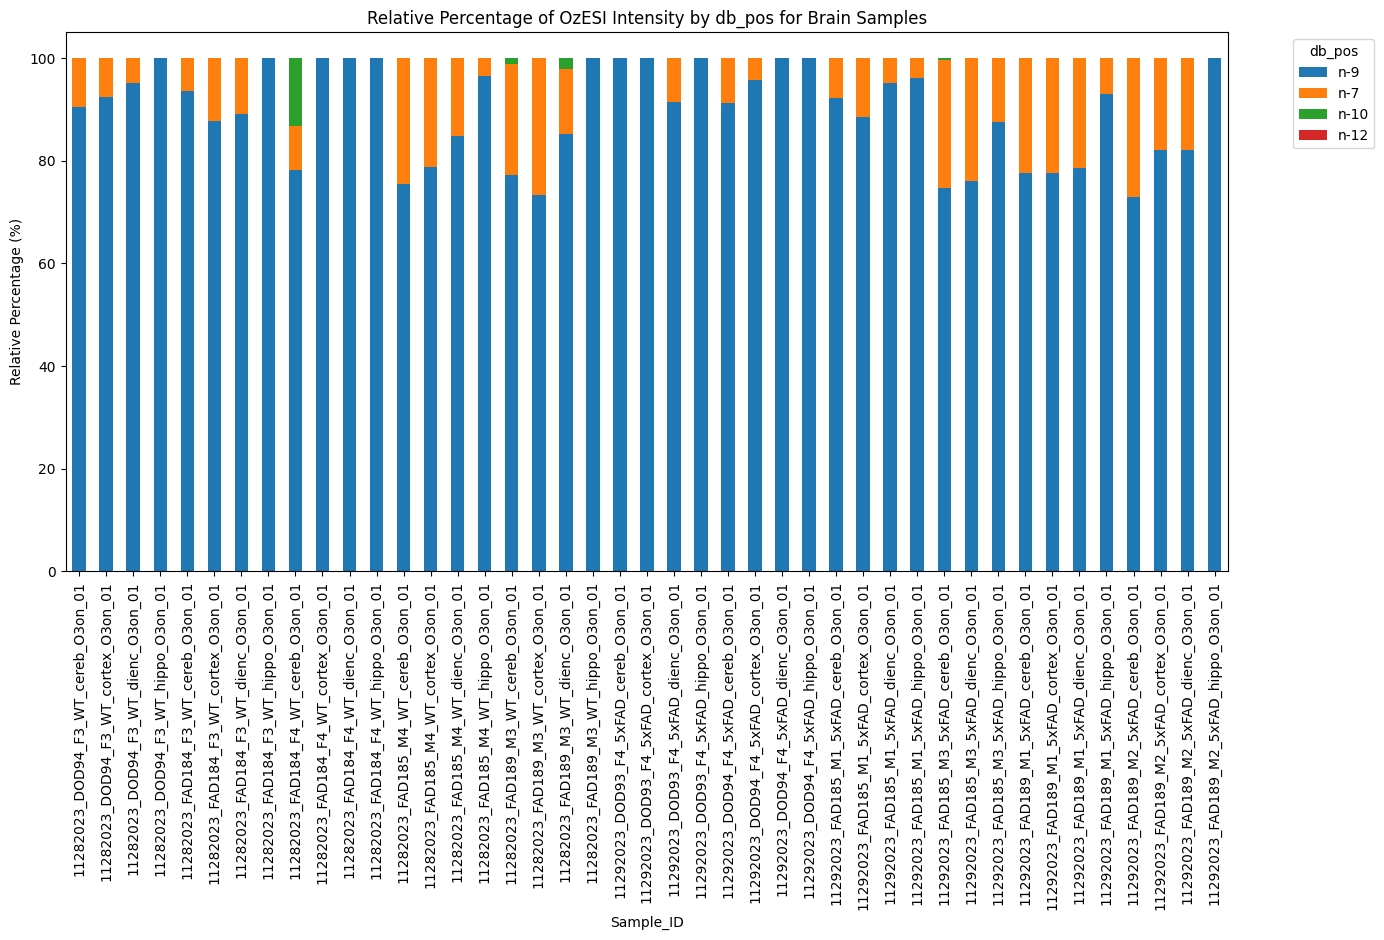

In [48]:
# Group by Sample_ID and db_pos, summing OzESI_Intensity
grouped_brain = brain_df.groupby(['Sample_ID', 'db_pos'])['OzESI_Intensity'].sum().reset_index()

# Calculating the total intensity for each Sample_ID
grouped_brain['Total_Intensity'] = grouped_brain.groupby('Sample_ID')['OzESI_Intensity'].transform('sum')

# Calculating the relative percentage of each db_pos
grouped_brain['Relative_Percentage'] = (grouped_brain['OzESI_Intensity'] / grouped_brain['Total_Intensity']) * 100

# Pivoting for plotting, ensuring the db_pos order is maintained
pivot_table_brain = grouped_brain.pivot(index='Sample_ID', columns='db_pos', values='Relative_Percentage')
pivot_table_brain = pivot_table_brain.reindex(['n-9', 'n-7', 'n-10', 'n-12'], axis=1, fill_value=0)

# Plotting all brain samples together
pivot_table_brain.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.ylabel('Relative Percentage (%)')
plt.title('Relative Percentage of OzESI Intensity by db_pos for Brain Samples')
plt.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Brain plot good

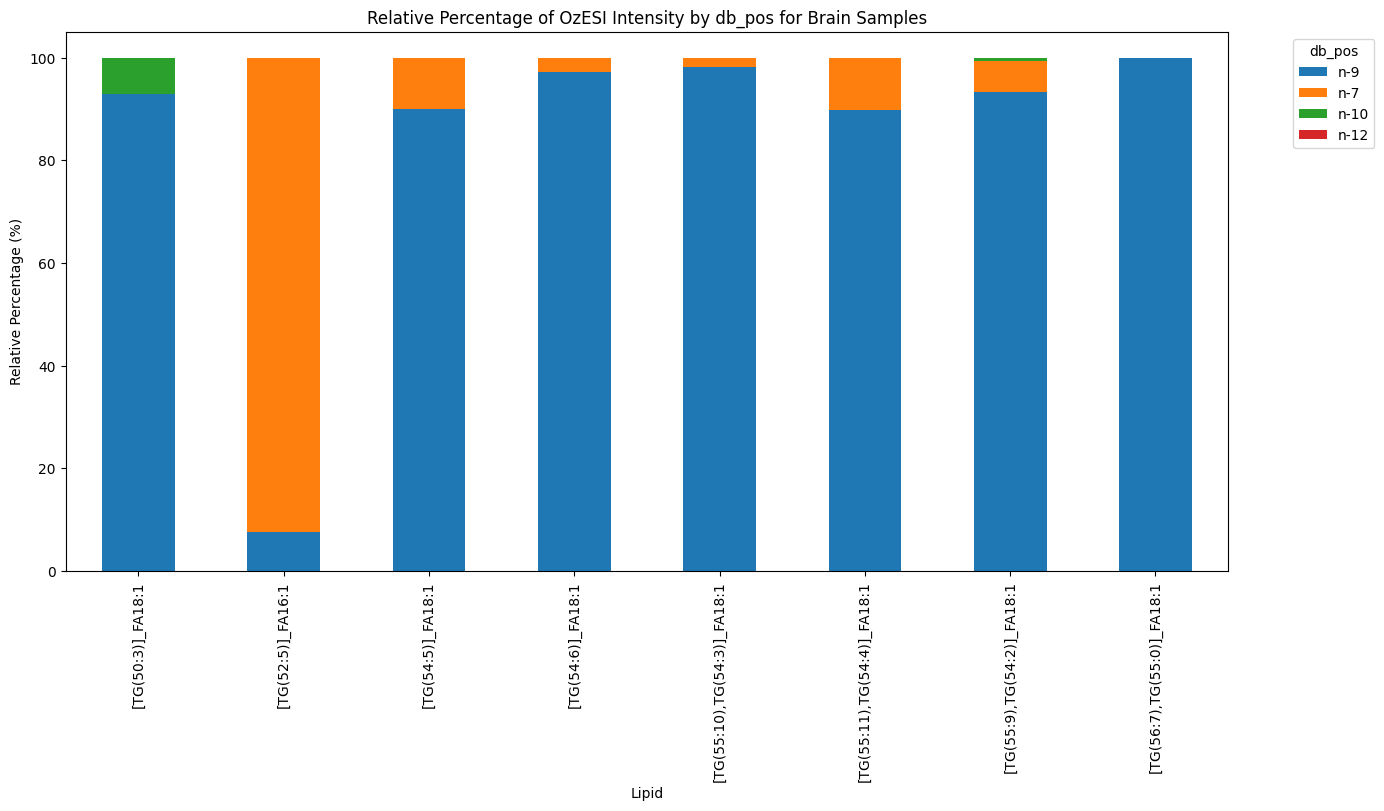

In [51]:
# Group by Sample_ID and db_pos, summing OzESI_Intensity
grouped_brain = brain_df.groupby(['Lipid', 'db_pos'])['OzESI_Intensity'].sum().reset_index()

# Calculating the total intensity for each Sample_ID
grouped_brain['Total_Intensity'] = grouped_brain.groupby('Lipid')['OzESI_Intensity'].transform('sum')

# Calculating the relative percentage of each db_pos
grouped_brain['Relative_Percentage'] = (grouped_brain['OzESI_Intensity'] / grouped_brain['Total_Intensity']) * 100

# Pivoting for plotting, ensuring the db_pos order is maintained
pivot_table_brain = grouped_brain.pivot(index='Lipid', columns='db_pos', values='Relative_Percentage')
pivot_table_brain = pivot_table_brain.reindex(['n-9', 'n-7', 'n-10', 'n-12'], axis=1, fill_value=0)

# Plotting all brain samples together
pivot_table_brain.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.ylabel('Relative Percentage (%)')
plt.title('Relative Percentage of OzESI Intensity by db_pos for Brain Samples')
plt.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

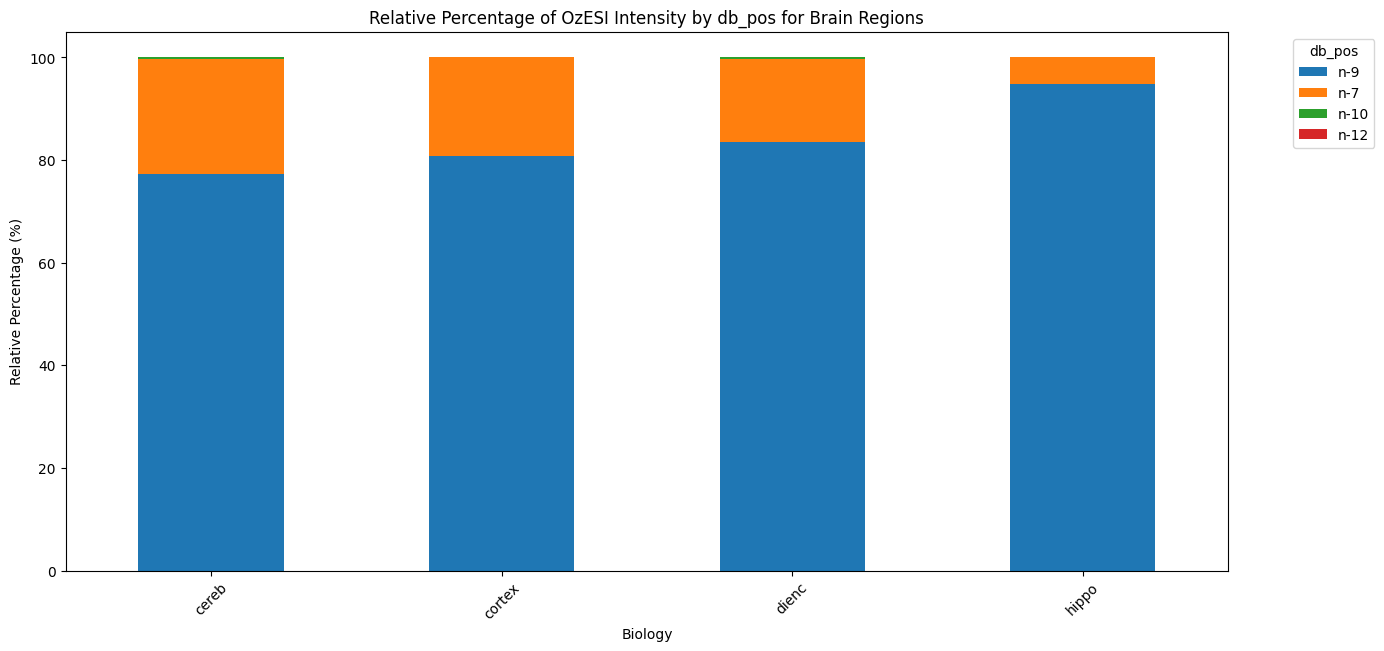

In [49]:
# Filter the DataFrame for the brain biology values
brain_regions = ['cortex', 'cereb', 'hippo', 'dienc']
brain_df = df[df['Biology'].isin(brain_regions)]

# Group by Biology (brain region), db_pos, summing OzESI_Intensity, and calculate relative percentages
grouped_brain = (
    brain_df.groupby(['Biology', 'db_pos'])['OzESI_Intensity']
    .sum()
    .groupby(level=0)
    .transform(lambda x: (x / x.sum()) * 100)
    .reset_index()
)

# Pivoting for plotting, ensuring the db_pos order is maintained
pivot_table_brain = grouped_brain.pivot(index='Biology', columns='db_pos', values='OzESI_Intensity')
pivot_table_brain = pivot_table_brain.reindex(columns=['n-9', 'n-7', 'n-10', 'n-12'], fill_value=0)

# Plotting with the brain regions on the x-axis
pivot_table_brain.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.ylabel('Relative Percentage (%)')
plt.title('Relative Percentage of OzESI Intensity by db_pos for Brain Regions')
plt.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

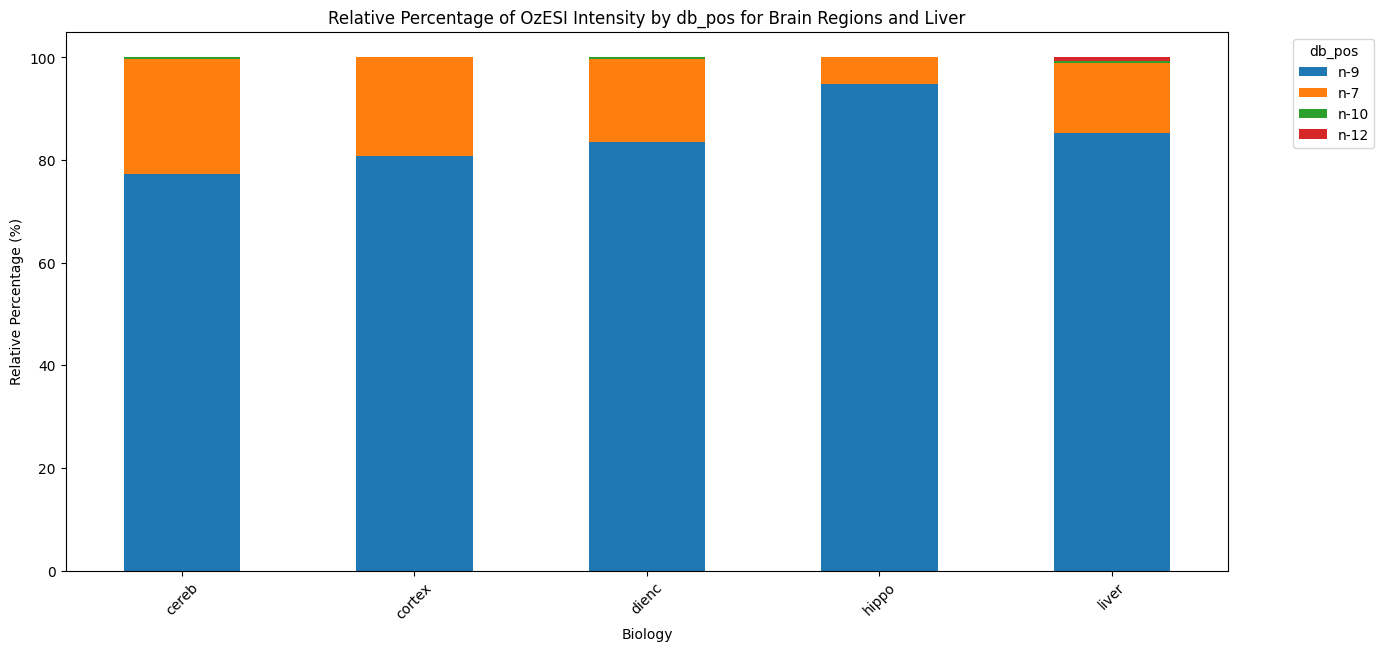

In [50]:
# First, let's create the liver data bar similar to how we did for the brain regions
liver_data = df[df['Biology'] == 'liver']

# Group by Biology (liver), db_pos, summing OzESI_Intensity, and calculate relative percentages
grouped_liver = (
    liver_data.groupby(['Biology', 'db_pos'])['OzESI_Intensity']
    .sum()
    .groupby(level=0)
    .transform(lambda x: (x / x.sum()) * 100)
    .reset_index()
)

# Pivoting for plotting, ensuring the db_pos order is maintained
pivot_table_liver = grouped_liver.pivot(index='Biology', columns='db_pos', values='OzESI_Intensity')
pivot_table_liver = pivot_table_liver.reindex(columns=['n-9', 'n-7', 'n-10', 'n-12'], fill_value=0)

# Now combine the brain and liver data
combined_pivot_table = pd.concat([pivot_table_brain, pivot_table_liver])

# Plotting with the brain regions and liver data on the x-axis
combined_pivot_table.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.ylabel('Relative Percentage (%)')
plt.title('Relative Percentage of OzESI Intensity by db_pos for Brain Regions and Liver')
plt.legend(title='db_pos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()
